In [114]:
import numpy as np
import matplotlib.pyplot as plt
import wave
from playsound import playsound as play

#%matplotlib inline

In [2]:
# This is the algorithm for computing DTFT of given signal
# The parameters for this Algorithm is a signal of shape (2, N) or  (N, )
# it has some default parameters like lower limit, higher limit and Number of points for omega axis

def dtft(signal, low_lim=-1*np.pi, high_lim=np.pi, N=100, endpoints=False):
    w = np.linspace(low_lim, high_lim, N, endpoint=endpoints)                  #Array of omega values
    e_jw = np.exp(w*1j)                                                    #computes e^{jw}
    
    # Creates a dictnationry to store dtft, Magnitude, Phase and omega
    dtft = dict()        
    # Creates a empty array for dtft
    dtft['complex'] = np.zeros(N, dtype=complex) 
    # Assiging omega values 
    dtft['omega'] = w
    
    # The following conditional statements are for checking whether the input(signal) is been provided with 
    # time stamps
    if signal.shape[0] == 2:
        for i in range(signal.shape[1]):
            dtft['complex'] += signal[0, i]*np.power(e_jw, -1*signal[1, i])
    else:
        for i in range(signal.shape[0]):
            dtft['complex'] += signal[i]*np.power(e_jw, -1*i)

    # Rounds-off the result upto 4 decimal places
    dtft['complex'] = np.round(dtft['complex'], decimals=4)
    # Finds the magnitude of the dtft computed above.
    dtft['magnitude'] = np.absolute(dtft['complex'])
    # Finds the phase of dtft in radians which lies in the range[-pi, pi]
    dtft['phase'] = np.angle(dtft['complex'], deg=0)
    return dtft


# This below function flips the w axis 
# Input:- X(e^jw) 
# Output:- X(e^-jw)
def negate_dtft(dtft):
    dtft['complex'] = np.flip(dtft['complex'])
    dtft['magnitude'] = np.absolute(dtft['complex'])
    dtft['phase'] = np.angle(dtft['complex'], deg=0)
    return dtft

# This below function finds the conjugate of dtft.
# Input:- X(e^jw) 
# Output:- X*(e^jw)
def conjugate(dtft):
    dtft['complex'] = np.conj(dtft['complex']) 
    dtft['phase'] = -1*dtft['phase']
    return dtft

In [3]:
# This function is used for plotting Real part, Imaginary part, Magnitude and Phase for a given DTFT

def dtft_plotter(dtft, title=None, complex_part=True):
    plt.rcParams['figure.figsize'] = [10, 8]
    
    if complex_part:
        fig, ax = plt.subplots(2,2)

        if title != None:
            fig.suptitle(title, fontweight="bold")

        ax[0, 0].title.set_text('Real Part')
        ax[0, 0].stem(dtft['omega'], np.real(dtft['complex']))
        ax[0, 0].set(ylabel='$Re\{X(e^{j \omega})\}$')

        ax[0, 1].title.set_text('Imaginary Part')
        ax[0, 1].stem(dtft['omega'], np.imag(dtft['complex']), 'tab:red')
        ax[0, 1].yaxis.tick_right()
        ax[0, 1].set(ylabel='$Im\{X(e^{j \omega})\}$')

        ax[1, 0].title.set_text('Magnitude')
        ax[1, 0].stem(dtft['omega'], dtft['magnitude'], 'tab:orange')
        ax[1, 0].set(xlabel='$\omega$', ylabel='$|X(e^{j \omega})|$')

        ax[1, 1].title.set_text('Phase')
        ax[1, 1].stem(dtft['omega'], dtft['phase'], 'tab:green')
        ax[1, 1].yaxis.tick_right()        
        ax[1, 1].set(ylabel='$\phi$')
    else:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        ax1.stem(dtft['omega'],dtft['magnitude'])
        ax1.set(xlabel='$\omega$', ylabel='$X(e^{j \omega})$')
        ax1.title.set_text('Magnitude')

        ax2.stem(dtft['omega'],dtft['phase'], 'tab:green')
        ax2.plot(xlabel = 'n', ylabel=r'$\phi$')
        ax2.title.set_text('Phase')

In [119]:
#This below function will take a file as .wav audio file as input and that verbose default parameter which will
#helpful for printing Specifications of audio file such as #frames, framerate, duration, etc.
#Output of this function will return audio signal array, time duration and Number of frames

def wavfile_to_nparray(FILE, verbose=0, time_len=None, normalise=False):
    audio_file = wave.open(FILE, 'rb')             #Opening the .wav file
    params = audio_file.getparams()                #Getting parameters of the audio file
    fr = params[2]
    if time_len != None:
        nframes = int(time_len*fr)
    else:
        nframes = params[3]
    audio_frame = audio_file.readframes(nframes)        #Reading all frames of the audio file 
    audio = np.zeros(nframes)                    #Creating an empty array for storing the values
    
    # Since the frames are3 being stores as bytes format each value will be a size of 1Byte(*bits)
    # Thus we get values ranging from 0 to 255
    # To avoid large values of dtft magnitude so we are normalizing signal from -1 to 1 
    # the audio signal to have better representation in time domain
    
    for i in range(len(audio_frame)):              
        audio[i] = audio_frame[i]                  #Storing the byte value in int array

    duration = nframes/fr                 #Time duration of the signal
    
    if normalise:
        audio = audio/2**7 - 1

    if verbose:
        print('Channels=',params[0], ', SampleWidth=', params[1],'\bbytes' 
              ,', Framerate=', fr, '\bHz', ', Frames=', nframes, '\nDuration:', time_len if time_len else 
              duration, '\bs\n')
    return audio, duration, nframes, fr

#This below function will Plot the Time signal. Computes DTFT and also plots Magnitude and phase

def analyise_wav_file(file, normalise, time_len=None, verbose=0):
    audio, t, frames, _ = wavfile_to_nparray(file, verbose=verbose, time_len=time_len, normalise=normalise)
    time = np.linspace(0, t, frames)
    
    dtft_audio = dtft(audio, N=100)
    
    plt.rcParams['figure.figsize'] = [20, 4]
    plt.rc('axes', labelsize=12)
    
    plt.figure()                                            #Plotting Time signal
    plt.title(file, fontsize='large', fontweight='bold')
    plt.plot(time, audio, color='green')

#                                                             #Plotting Magnitude and Phase
    fig, (ax1, ax2) = plt.subplots(1,2)
    plt.suptitle("DTFT of "+file)
    ax1.title.set_text('Magnitude')
    ax1.stem(dtft_audio['omega'], dtft_audio['magnitude'])
    ax1.set(xlabel='$\omega$', ylabel='$|X(e^{j \omega})|$')

    ax2.title.set_text('Phase')
    ax2.set(xlabel='$\omega$', ylabel='$\phi$')
    ax2.stem(dtft_audio['omega'], dtft_audio['phase'], 'tab:red')
#     dtft_plotter(dtft_audio)

In [5]:
def fr_alter(file, fr_scale, nchannels=1, sampwidth=1):
    audio_file = wave.open(file, 'rb')
    audio_data = audio_file.readframes(-1)
    audio_fr =  audio_file.getframerate()
    audio_file.close()
    
    new_filename = file[:-4]+'_' + str(fr_scale) +'fs.wav'
    new_file = wave.open(new_filename, 'wb')

    new_file.setnchannels(nchannels)
    new_file.setsampwidth(sampwidth)
    new_file.setframerate(fr_scale*audio_fr)
    new_file.writeframesraw(audio_data)
    new_file.close()
    
    return new_filename

Playback speed is slower.
The sampling frequency(fs) is reduced by 4-folds, resulting in aliasing where unwanted low frequency components are also having spikes seen here.The spike seen in original magnitude plot in between (2, 3) in omega axis is also observed in new audio file in  between (1, 2)


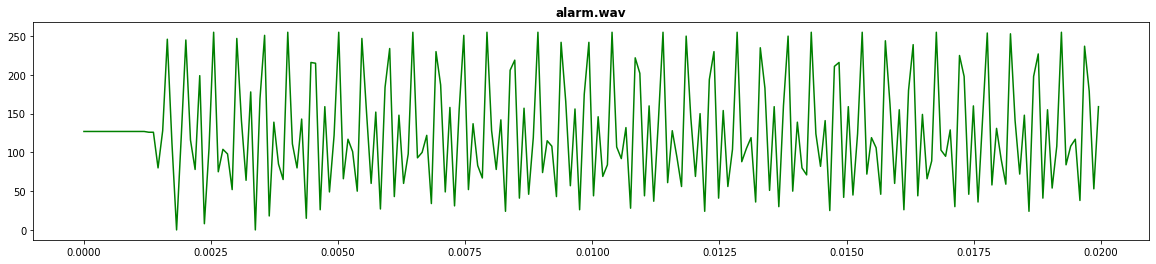

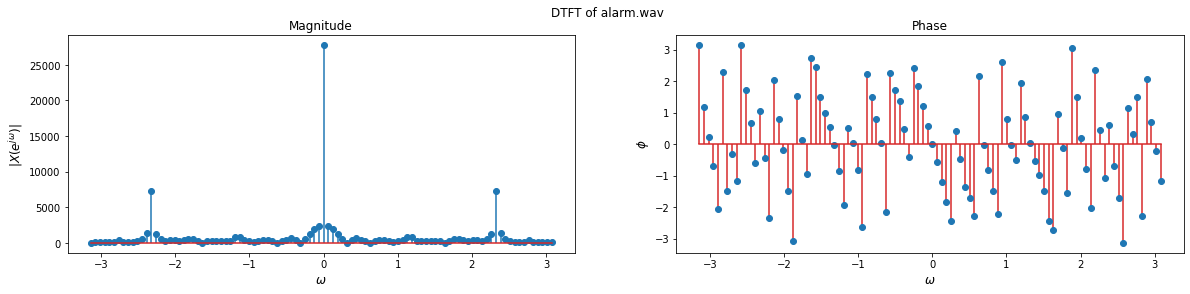

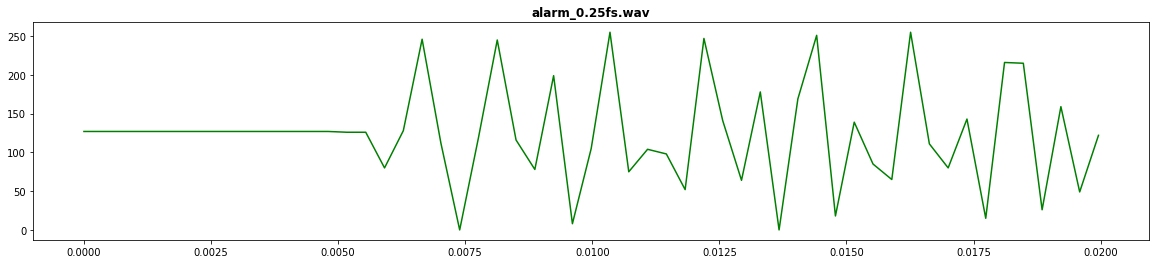

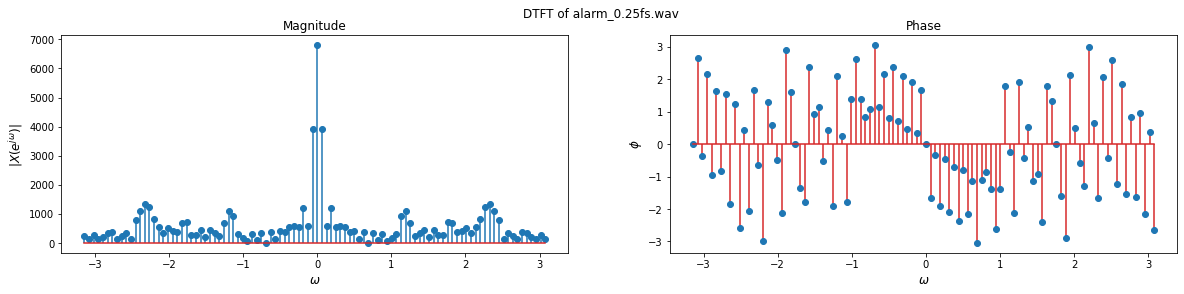

In [120]:
file = 'alarm.wav'
new_filename = fr_alter(file, 0.25)

play(file)
analyise_wav_file(file, time_len=0.02, normalise=False)

play(new_filename)
analyise_wav_file(new_filename, time_len=0.02, normalise=False)

print("Playback speed is slower.")
print("The sampling frequency(fs) is reduced by 4-folds, resulting in aliasing where unwanted"
      , "low frequency components are also having spikes seen here.The spike seen in"
      , "original magnitude plot in between (2, 3) in omega axis is also observed in new audio file in "
      , "between (1, 2)")

Playback speed is slow.
The sampling frequency(fs) is reduced by 2-folds, resulting in aliasing where unwanted low frequency components are also having spikes seen here.The spike seen in original magnitude plot in between (2, 3) in omega axis is also observed in new audio file in  between (1, 2). But this new framerate is better than previously observed.


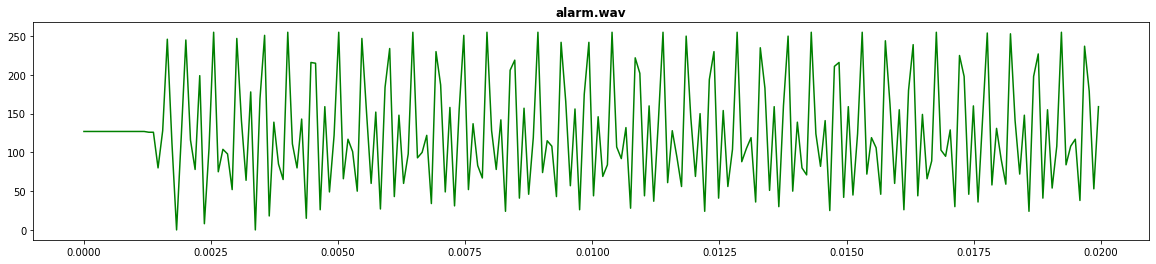

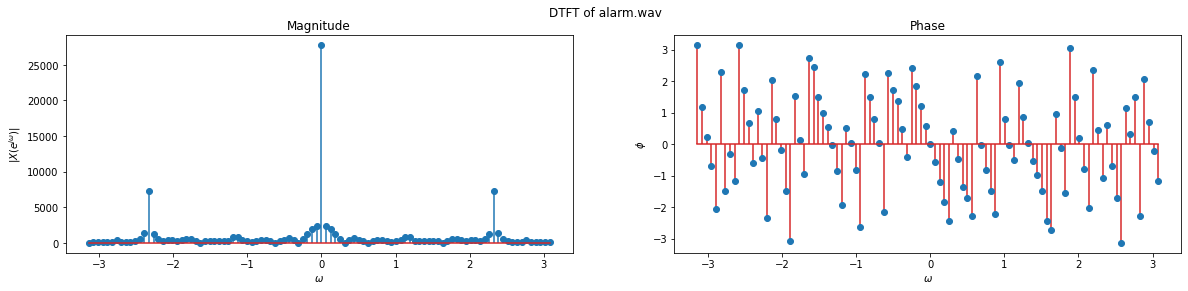

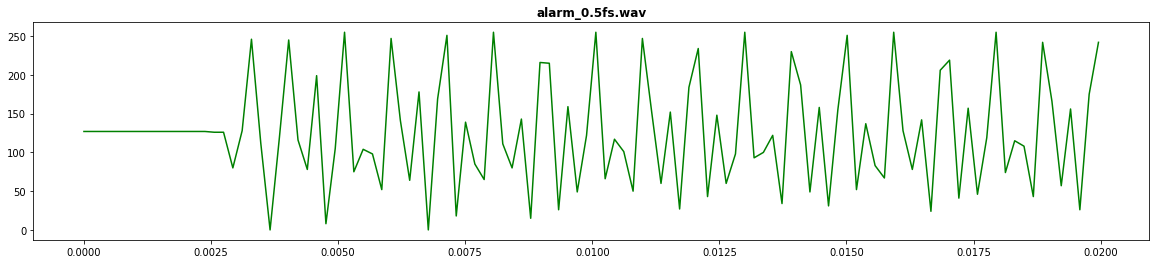

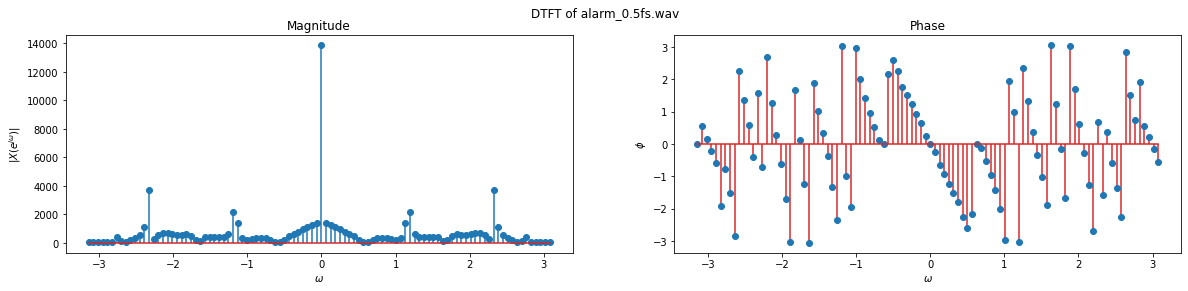

In [7]:
new_filename = fr_alter(file, 0.50)

play(file)
analyise_wav_file(file, time_len=0.02, normalise=False)

play(new_filename)
analyise_wav_file(new_filename, time_len=0.02, normalise=False)


print("Playback speed is slow.")
print("The sampling frequency(fs) is reduced by 2-folds, resulting in aliasing where unwanted"
      , "low frequency components are also having spikes seen here.The spike seen in"
      , "original magnitude plot in between (2, 3) in omega axis is also observed in new audio file in "
      , "between (1, 2). But this new framerate is better than previously observed.")

Playback speed is same.
This is just same as the original audio content


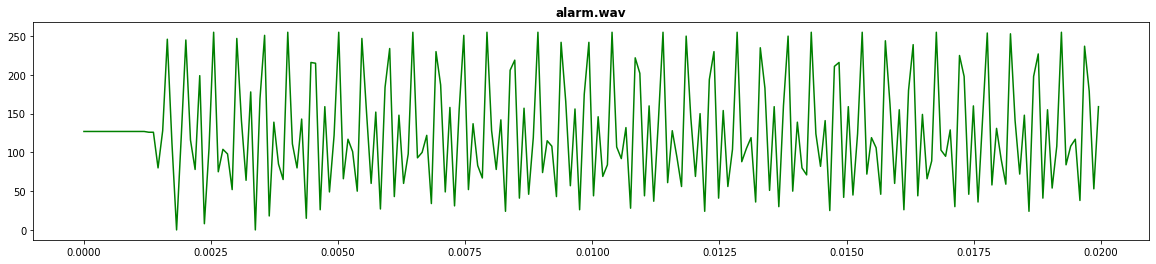

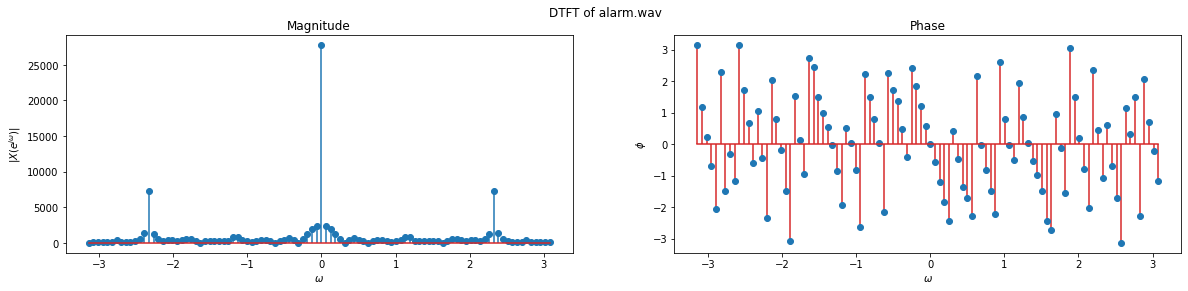

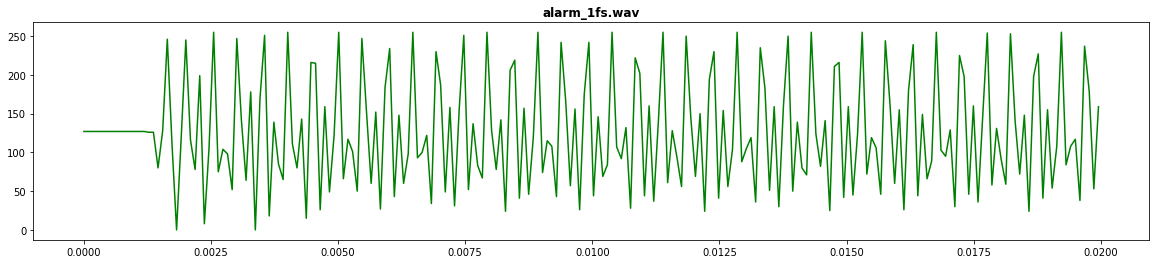

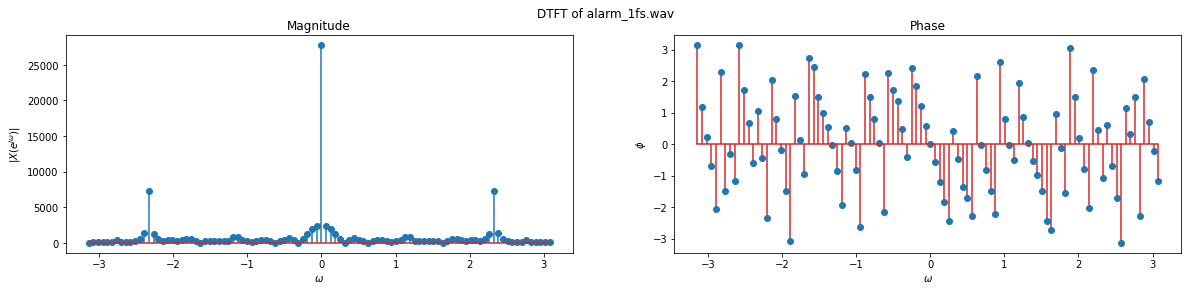

In [8]:
new_filename = fr_alter(file, 1)

play(file)
analyise_wav_file(file, time_len=0.02, normalise=False)

play(new_filename)
analyise_wav_file(new_filename, time_len=0.02, normalise=False)

print("Playback speed is same.")
print("This is just same as the original audio content")

Playback speed is fast.
Magnitude of frequency components are reducing due to high sampling rate(2fs) and there is no aliasing effect


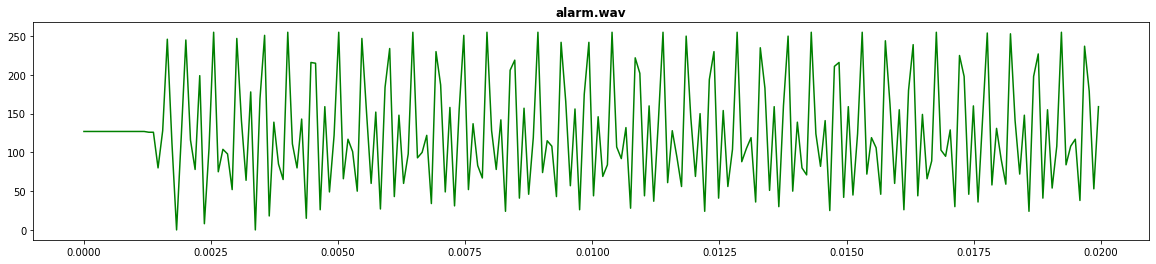

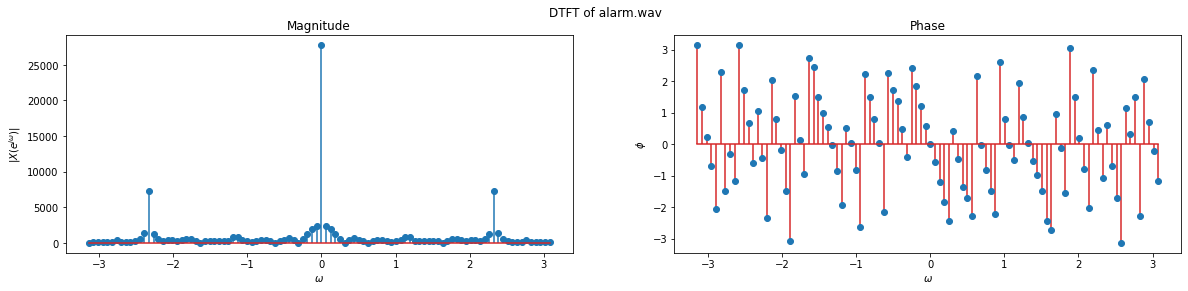

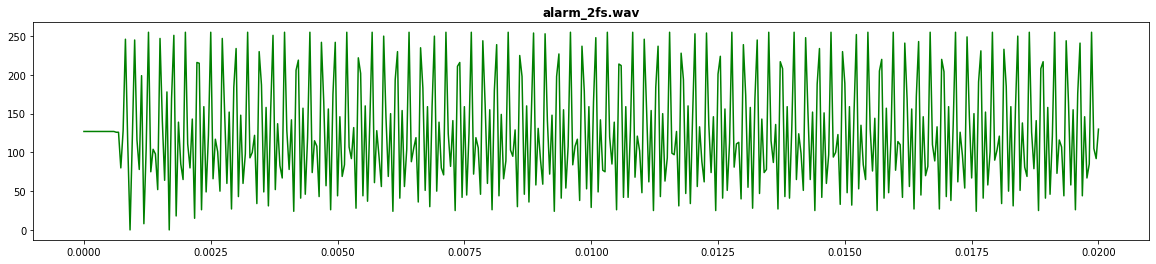

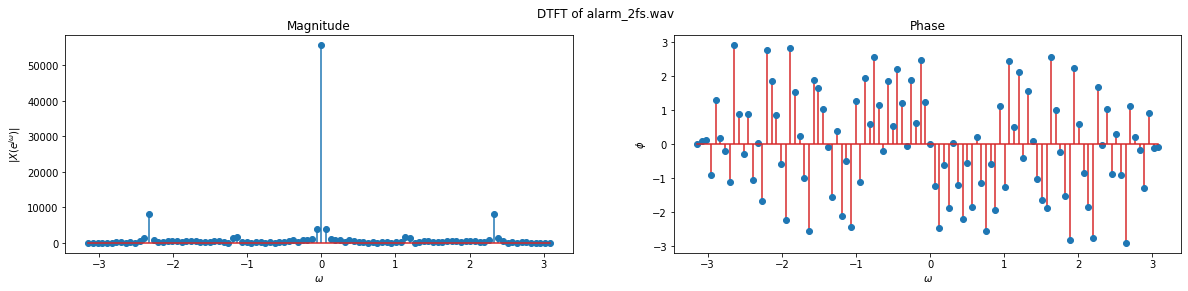

In [9]:
new_filename = fr_alter(file, 2)

play(file)
analyise_wav_file(file, time_len=0.02, normalise=False)

play(new_filename)
analyise_wav_file(new_filename, time_len=0.02, normalise=False)

print("Playback speed is fast.")
print("Magnitude of frequency components are reducing due to high sampling rate(2fs) and there is",
      "no aliasing effect")

Playback speed is slower.
The sampling frequency(fs) is reduced by 4-folds, resulting in aliasing where unwanted low frequency components are enhanced where their bandwidth is been increased significantly compared to original one


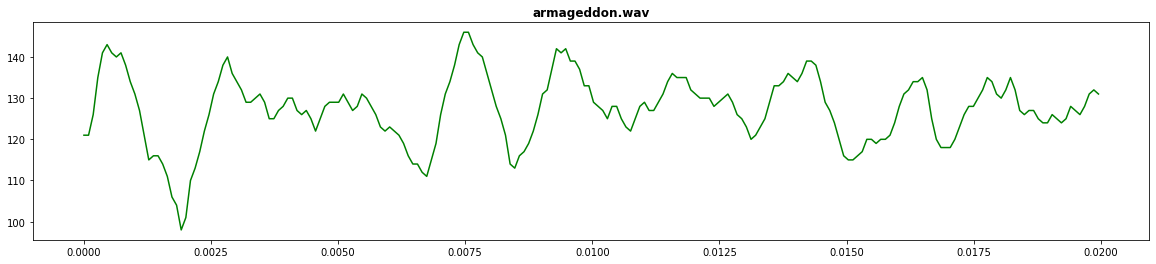

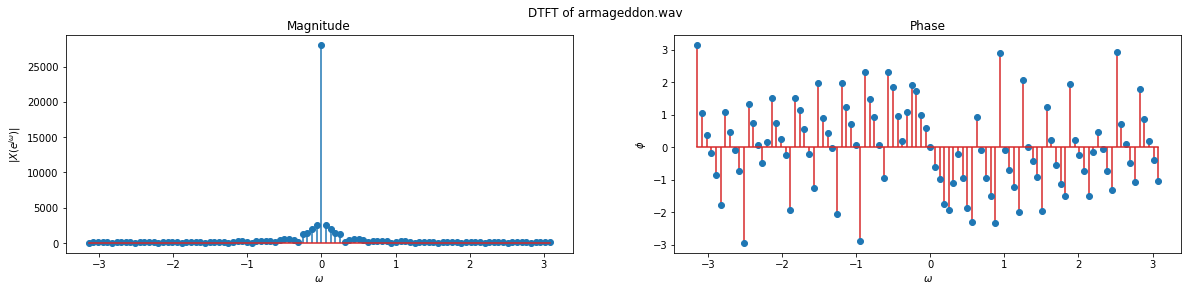

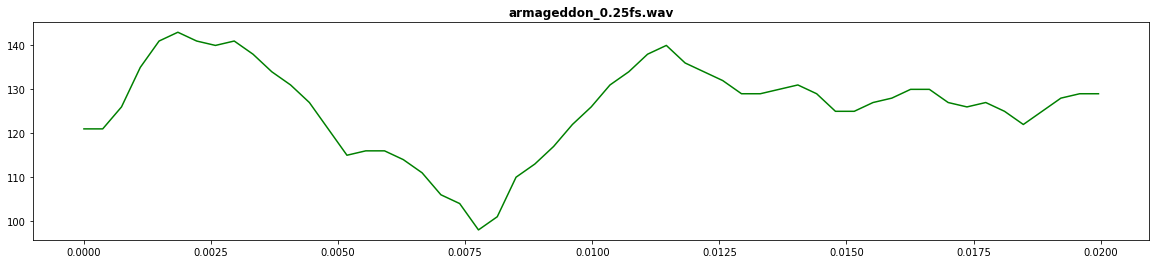

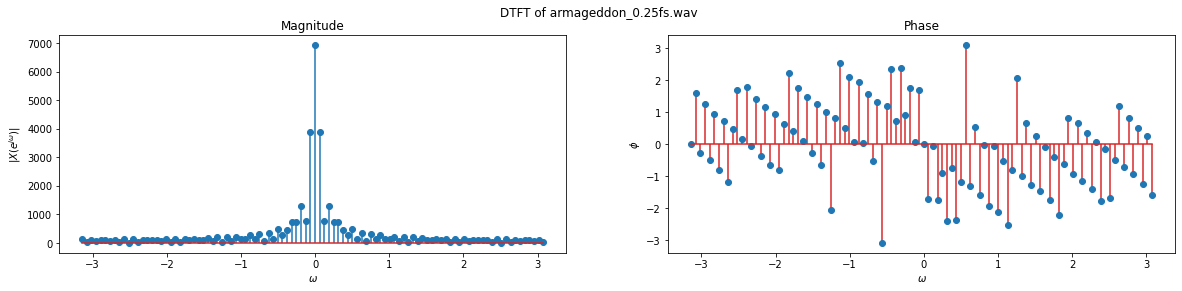

In [10]:
file = 'armageddon.wav'
new_filename = fr_alter(file, 0.25)

play(file)
analyise_wav_file(file, time_len=0.02, normalise=False)

play(new_filename)
analyise_wav_file(new_filename, time_len=0.02, normalise=False)


print("Playback speed is slower.")
print("The sampling frequency(fs) is reduced by 4-folds, resulting in aliasing where unwanted"
      , "low frequency components are enhanced where their bandwidth is been increased significantly compared to original one")

Playback speed is slow.
The sampling frequency(fs) is reduced by 2-folds, resulting in aliasing where unwanted low frequency components are enhanced where their bandwidth is been increased compared to original one .But this new framerate is better than previously observed.


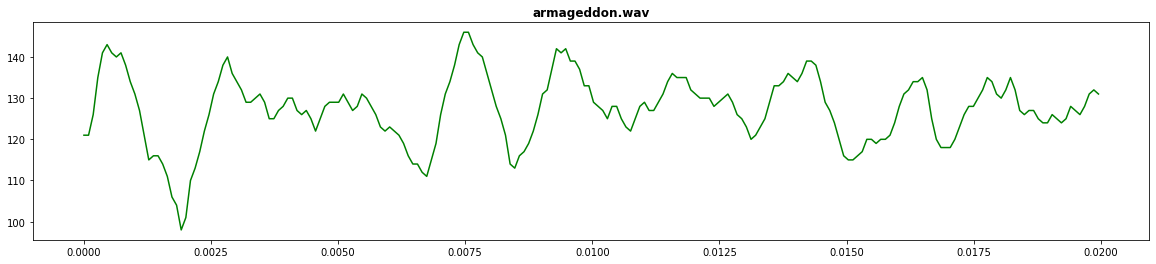

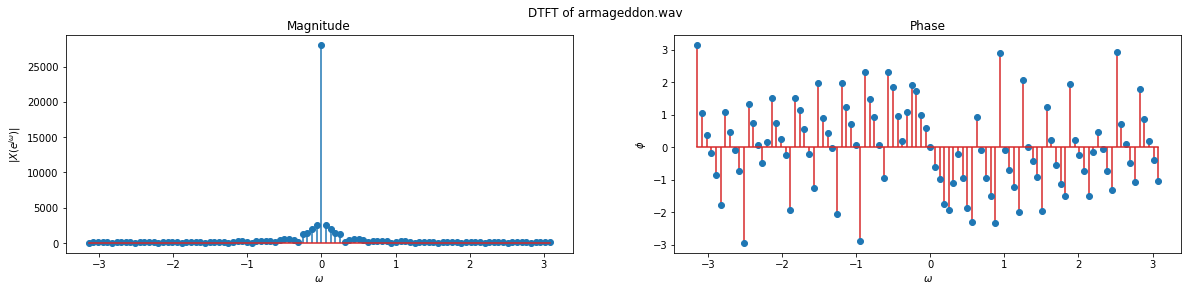

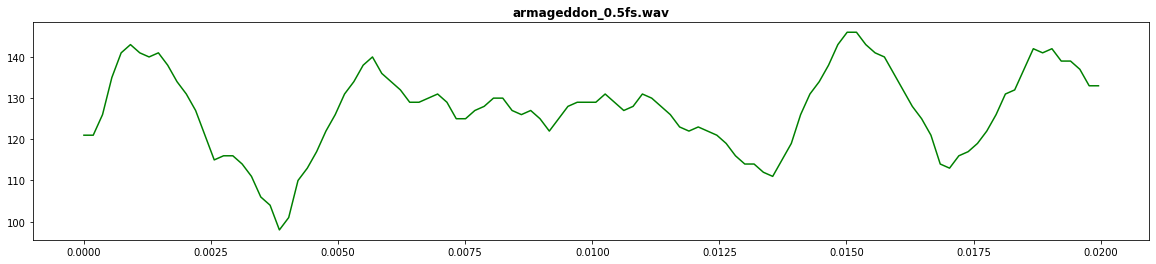

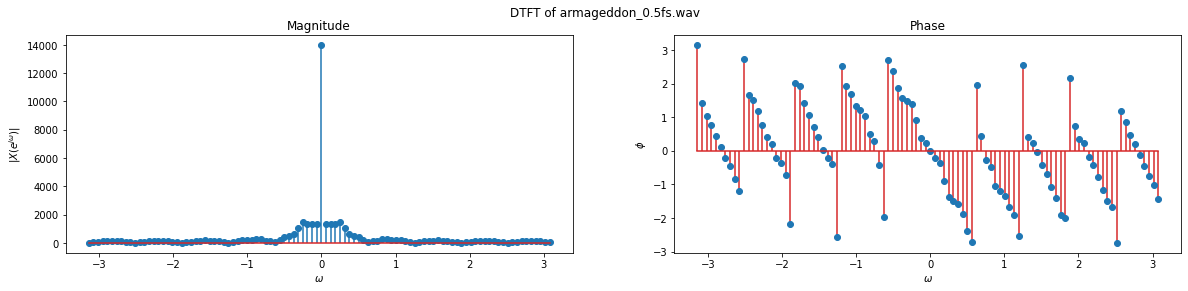

In [11]:
new_filename = fr_alter(file, 0.50)

play(file)
analyise_wav_file(file, time_len=0.02, normalise=False)

play(new_filename)
analyise_wav_file(new_filename, time_len=0.02, normalise=False)

print("Playback speed is slow.")
print("The sampling frequency(fs) is reduced by 2-folds, resulting in aliasing where unwanted"
      , "low frequency components are enhanced where their bandwidth is been increased compared to original one"
      ,".But this new framerate is better than previously observed.")

Playback speed is same.
This is just same as the original audio content


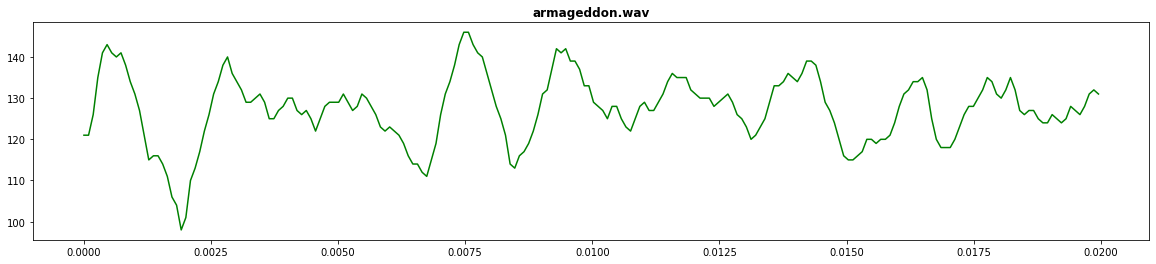

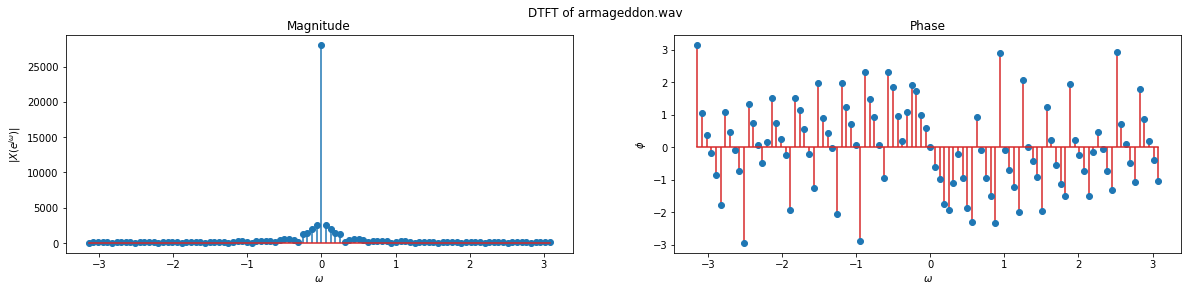

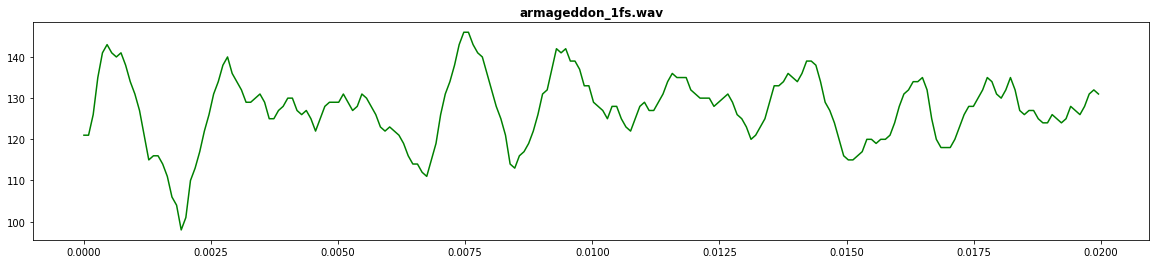

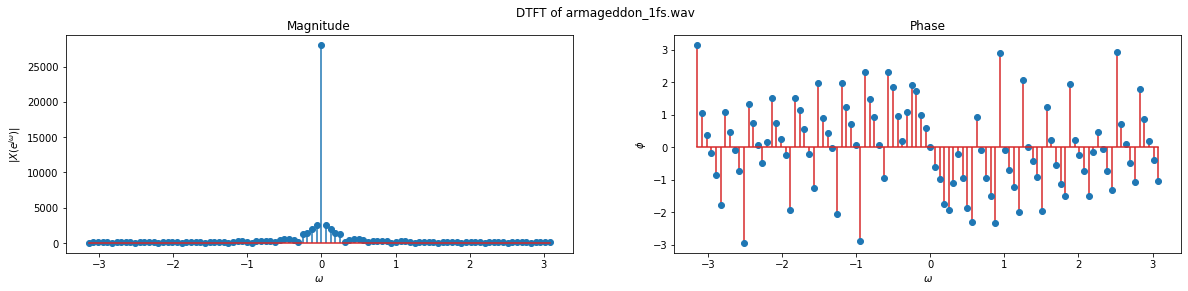

In [12]:
new_filename = fr_alter(file, 1)

play(file)
analyise_wav_file(file, time_len=0.02, normalise=False)

play(new_filename)
analyise_wav_file(new_filename, time_len=0.02, normalise=False)


print("Playback speed is same.")
print("This is just same as the original audio content")

Playback speed is fast.
Magnitude of frequency components are reducing due to high sampling rate(2fs) and there is no aliasing effect


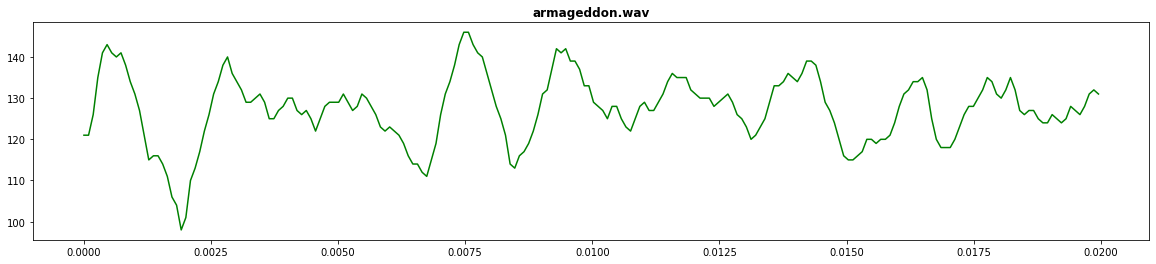

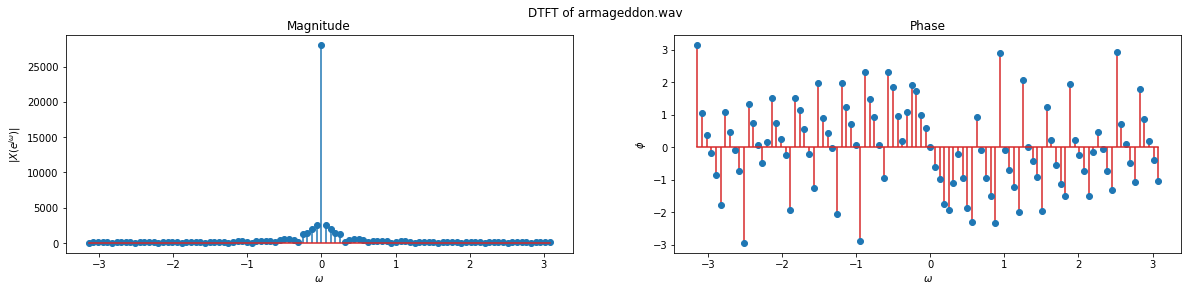

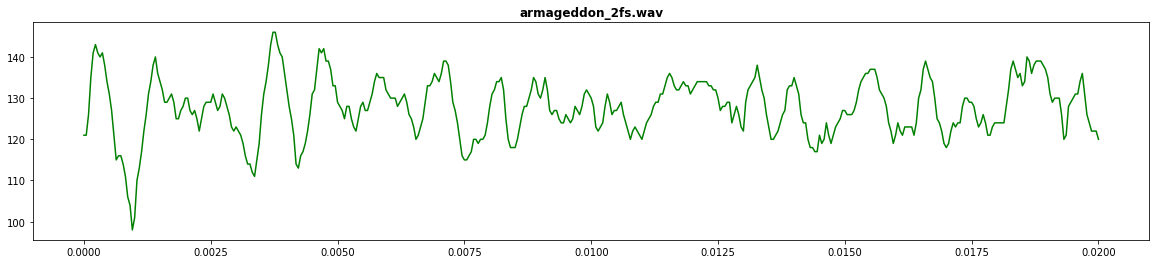

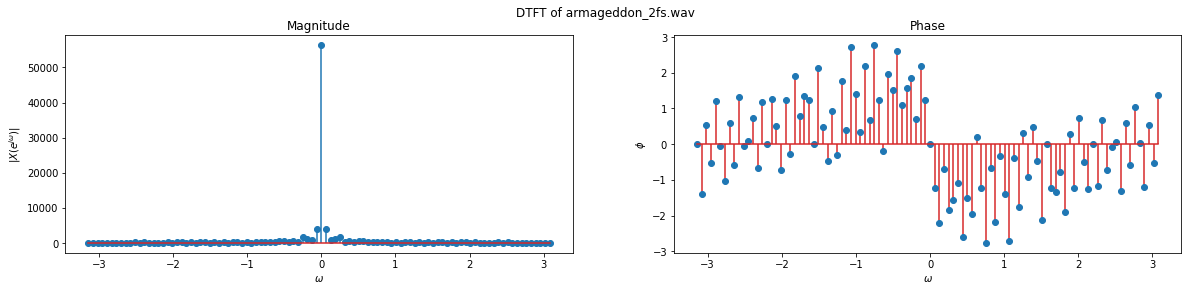

In [13]:
new_filename = fr_alter(file, 2)

play(file)
analyise_wav_file(file, time_len=0.02, normalise=False)

play(new_filename)
analyise_wav_file(new_filename, time_len=0.02, normalise=False)


print("Playback speed is fast.")
print("Magnitude of frequency components are reducing due to high sampling rate(2fs) and there is",
      "no aliasing effect")

Playback speed is slower.
The sampling frequency(fs) is reduced by 4-folds, resulting in aliasing where unwanted low frequency components are enhanced where their bandwidth is been increased significantly compared to original one


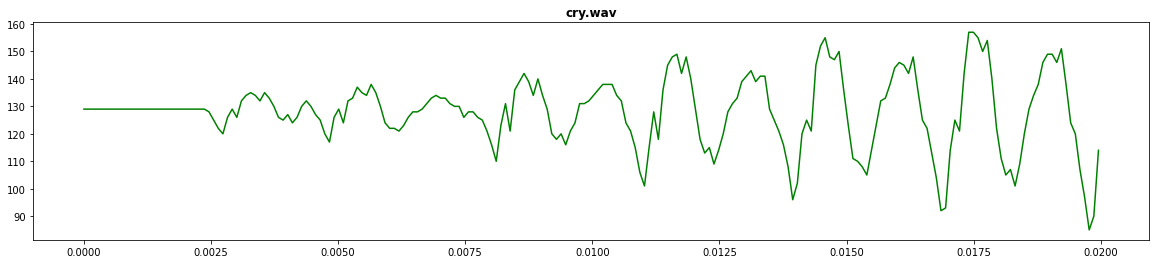

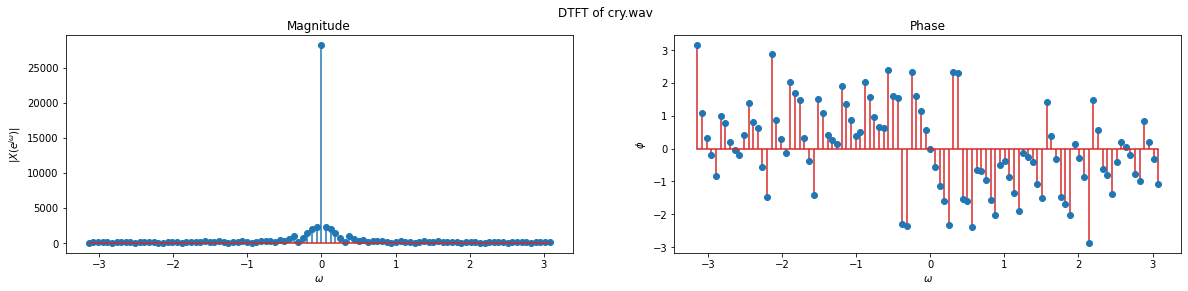

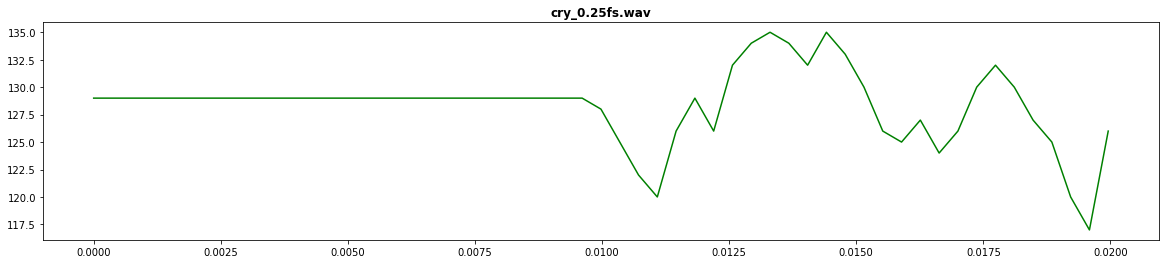

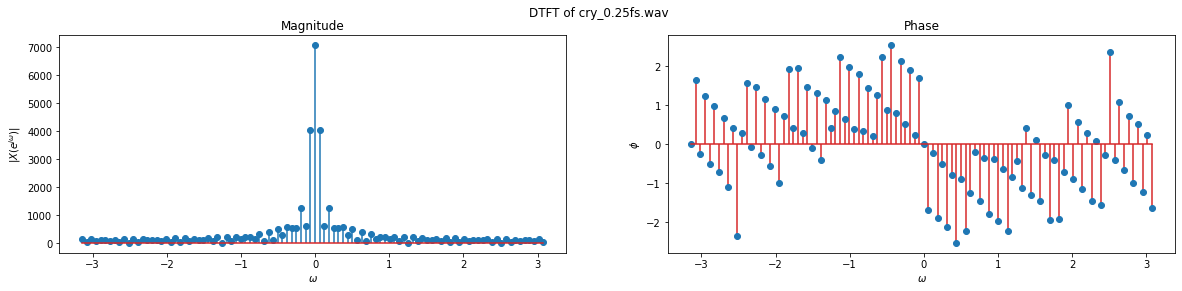

In [14]:
file = 'cry.wav'
new_filename = fr_alter(file, 0.25)

play(file)
analyise_wav_file(file, time_len=0.02, normalise=False)

play(new_filename)
analyise_wav_file(new_filename, time_len=0.02, normalise=False)


print("Playback speed is slower.")
print("The sampling frequency(fs) is reduced by 4-folds, resulting in aliasing where unwanted"
      , "low frequency components are enhanced where their bandwidth is been increased significantly compared to original one")

Playback speed is slow.
The sampling frequency(fs) is reduced by 2-folds, resulting in aliasing where unwanted low frequency components are enhanced where their bandwidth is been increased compared to original one .But this new framerate is better than previously observed.


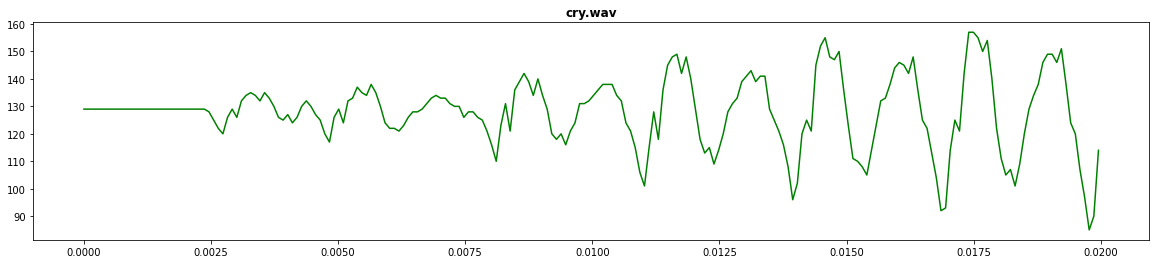

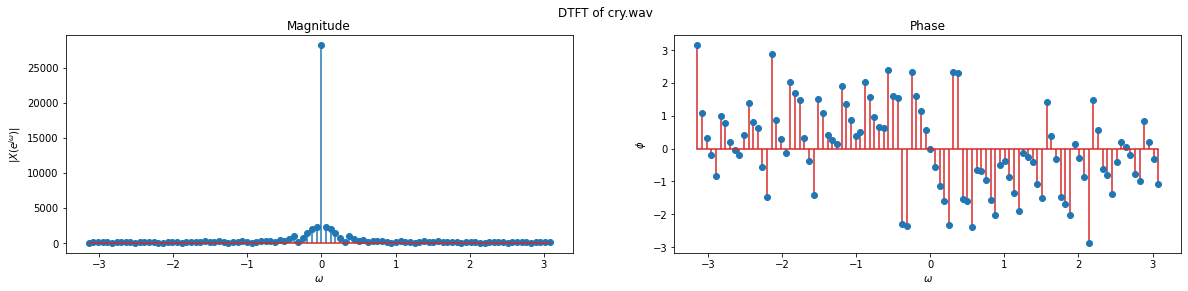

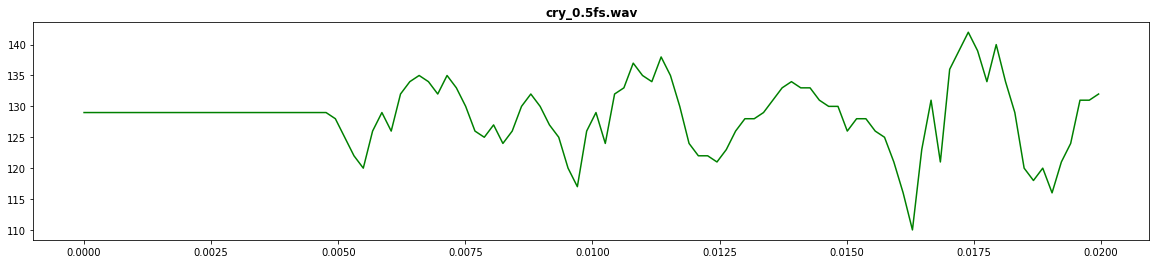

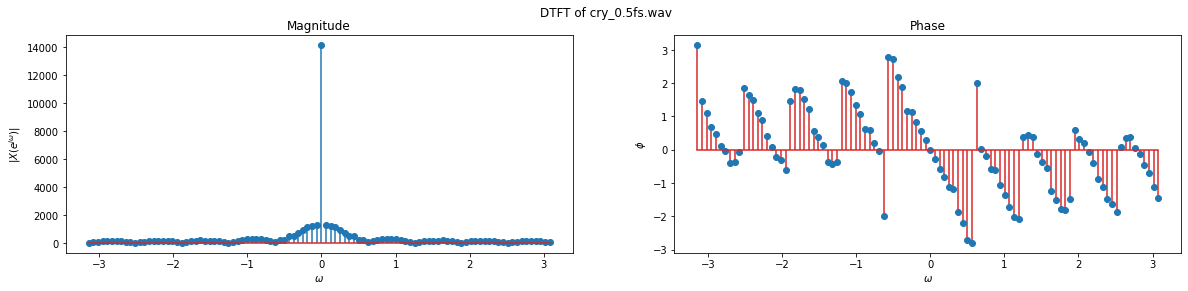

In [15]:
new_filename = fr_alter(file, 0.50)

play(file)
analyise_wav_file(file, time_len=0.02, normalise=False)

play(new_filename)
analyise_wav_file(new_filename, time_len=0.02, normalise=False)


print("Playback speed is slow.")
print("The sampling frequency(fs) is reduced by 2-folds, resulting in aliasing where unwanted"
      , "low frequency components are enhanced where their bandwidth is been increased compared to original one"
      ,".But this new framerate is better than previously observed.")

Playback speed is same.
This is just same as the original audio content


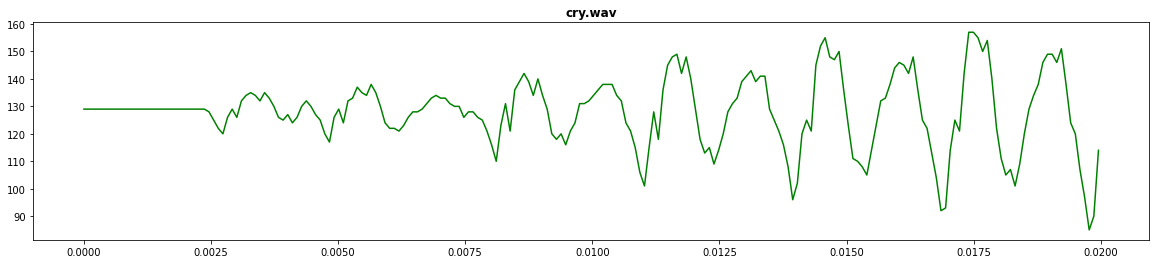

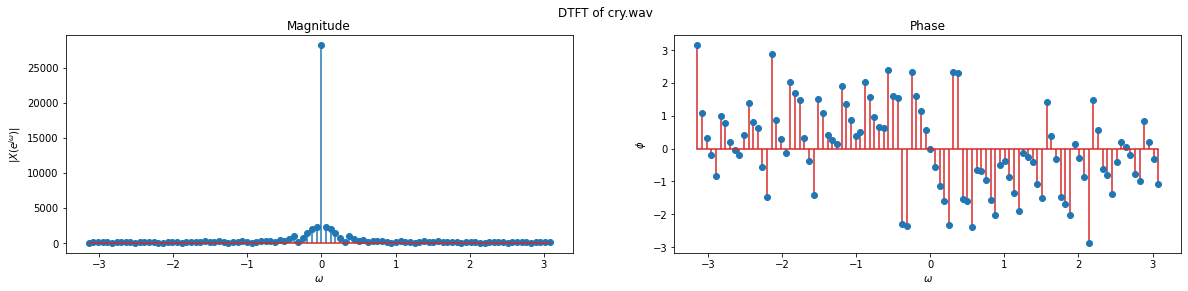

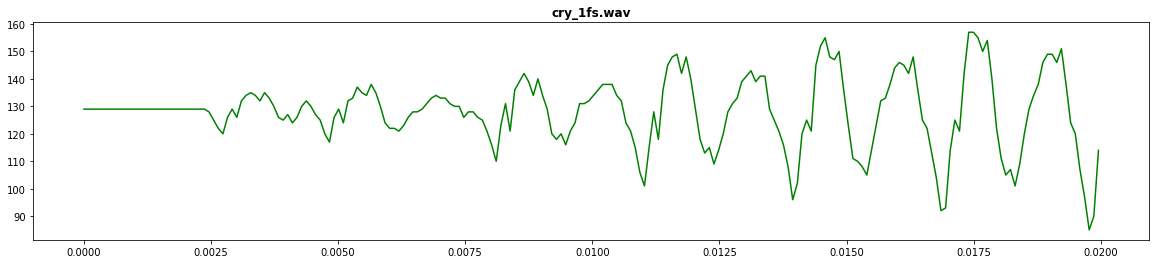

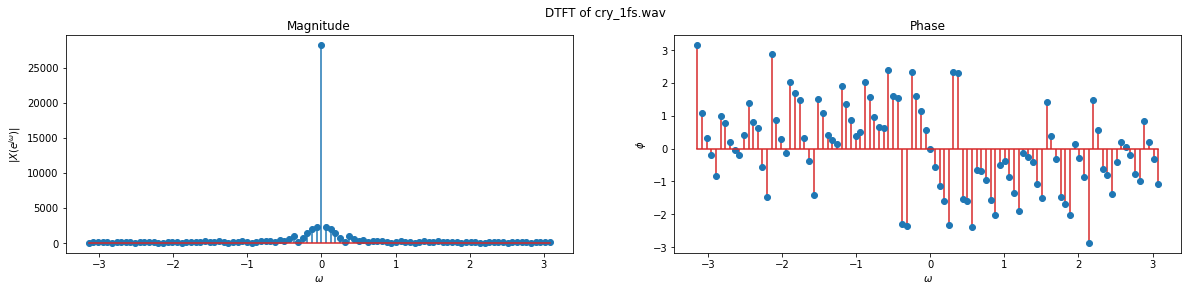

In [16]:
new_filename = fr_alter(file, 1)

play(file)
analyise_wav_file(file, time_len=0.02, normalise=False)

play(new_filename)
analyise_wav_file(new_filename, time_len=0.02, normalise=False)


print("Playback speed is same.")
print("This is just same as the original audio content")

Playback speed is fast.
Magnitude of frequency components are reducing due to high sampling rate(2fs) and there is no aliasing effect


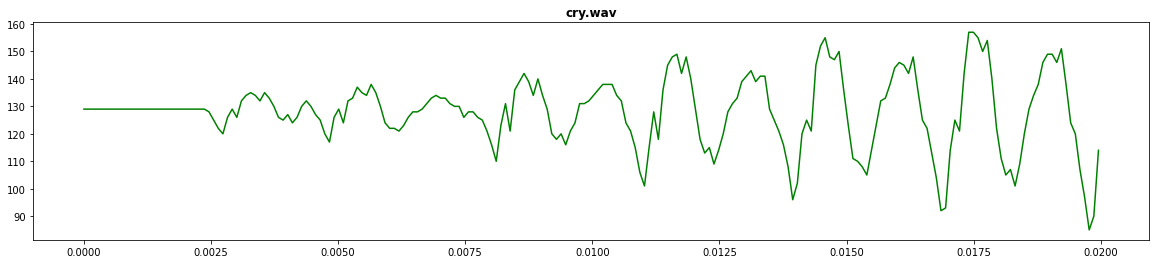

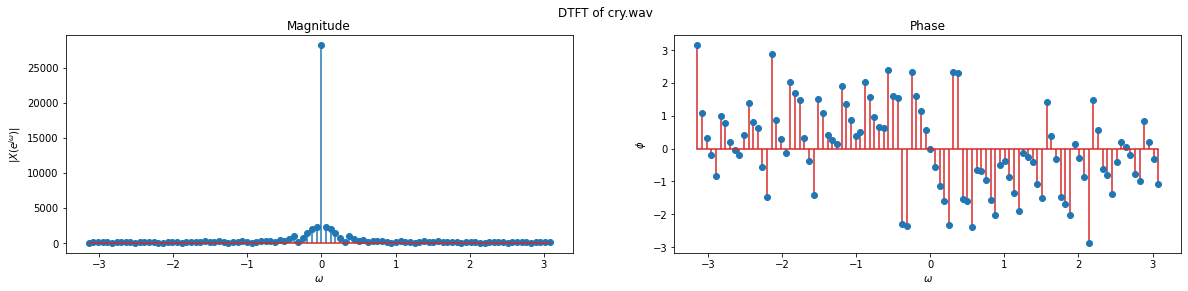

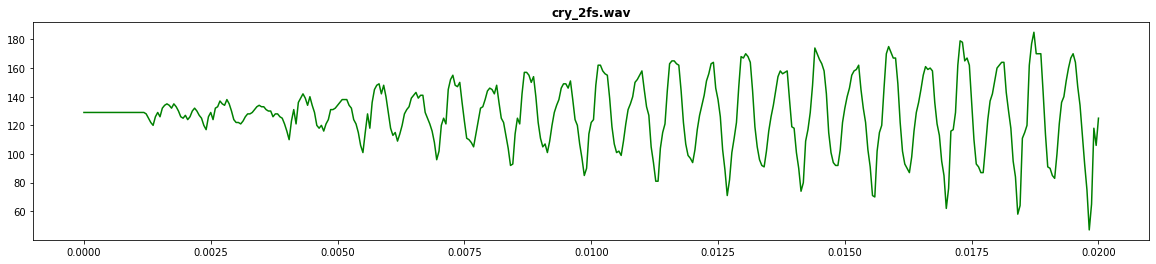

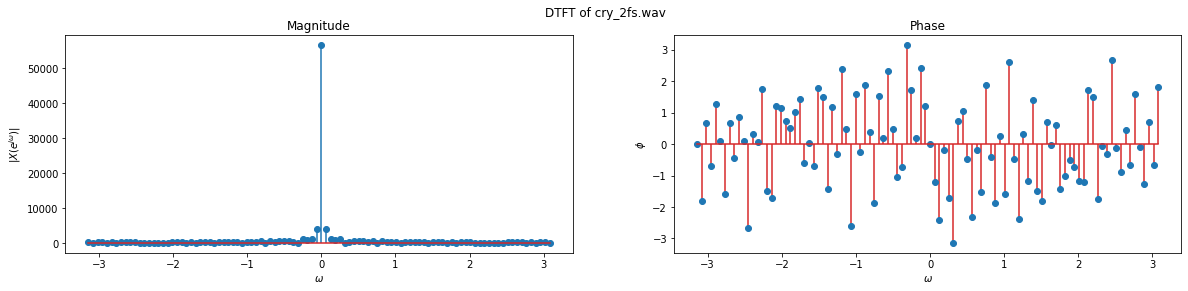

In [17]:
new_filename = fr_alter(file, 2)

play(file)
analyise_wav_file(file, time_len=0.02, normalise=False)

play(new_filename)
analyise_wav_file(new_filename, time_len=0.02, normalise=False)


print("Playback speed is fast.")
print("Magnitude of frequency components are reducing due to high sampling rate(2fs) and there is",
      "no aliasing effect")

Playback speed is slower.
The sampling frequency(fs) is reduced by 4-folds, resulting in aliasing where unwanted low frequency components are enhanced where their bandwidth is been increased significantly compared to original one


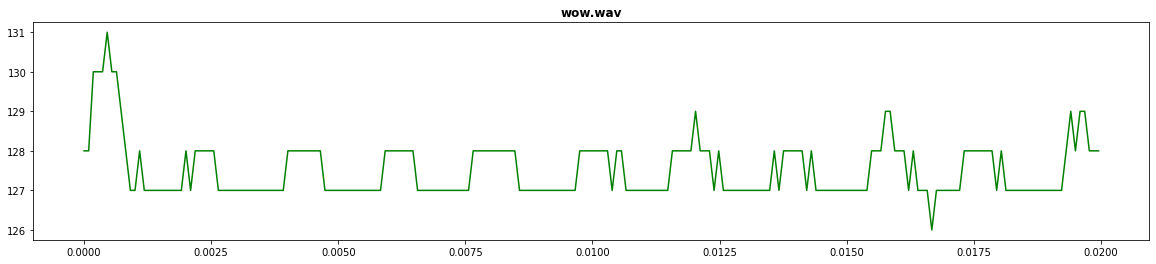

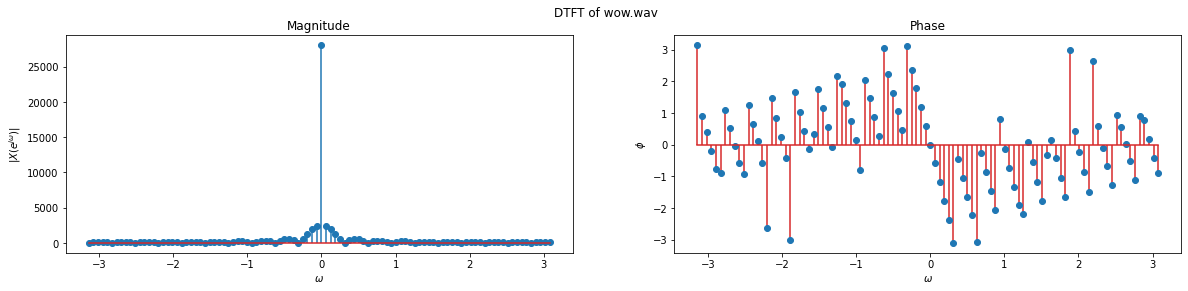

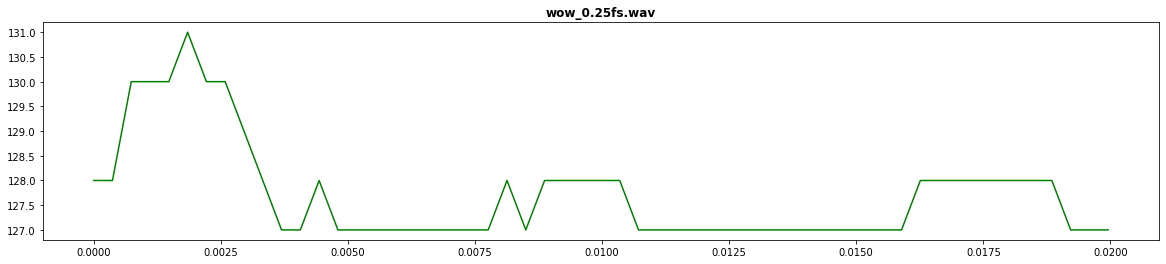

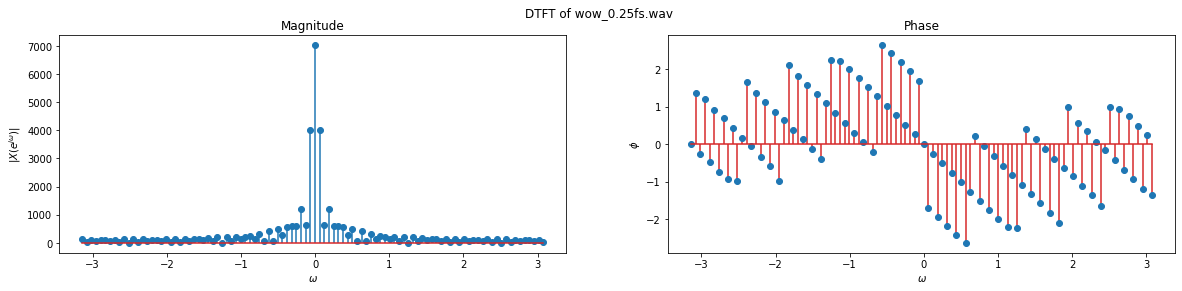

In [18]:
file = 'wow.wav'
new_filename = fr_alter(file, 0.25)

play(file)
analyise_wav_file(file, time_len=0.02, normalise=False)

play(new_filename)
analyise_wav_file(new_filename, time_len=0.02, normalise=False)

print("Playback speed is slower.")
print("The sampling frequency(fs) is reduced by 4-folds, resulting in aliasing where unwanted"
      , "low frequency components are enhanced where their bandwidth is been increased significantly compared to original one")

Playback speed is slow.
The sampling frequency(fs) is reduced by 2-folds, resulting in aliasing where unwanted low frequency components are enhanced where their bandwidth is been increased compared to original one .But this new framerate is better than previously observed.


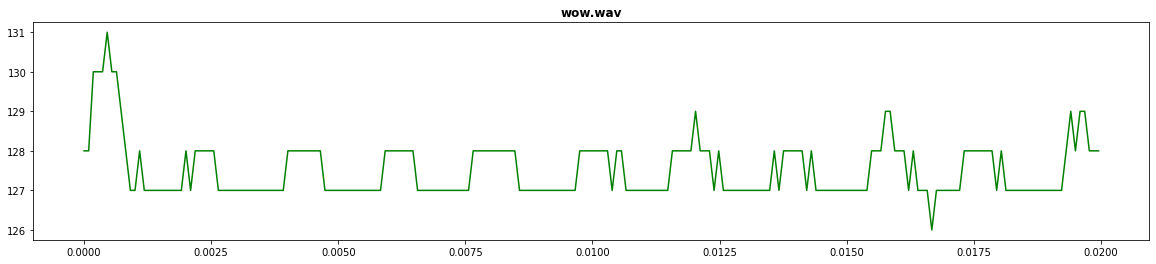

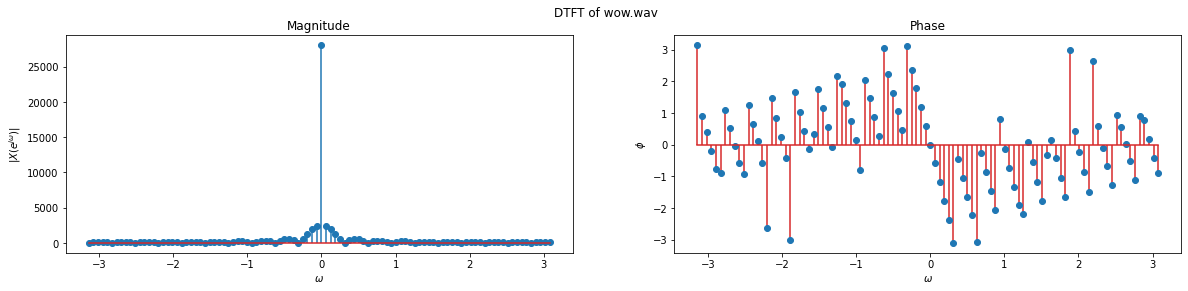

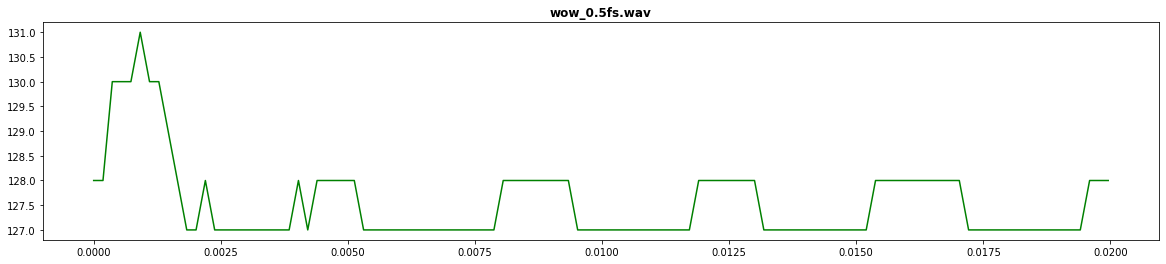

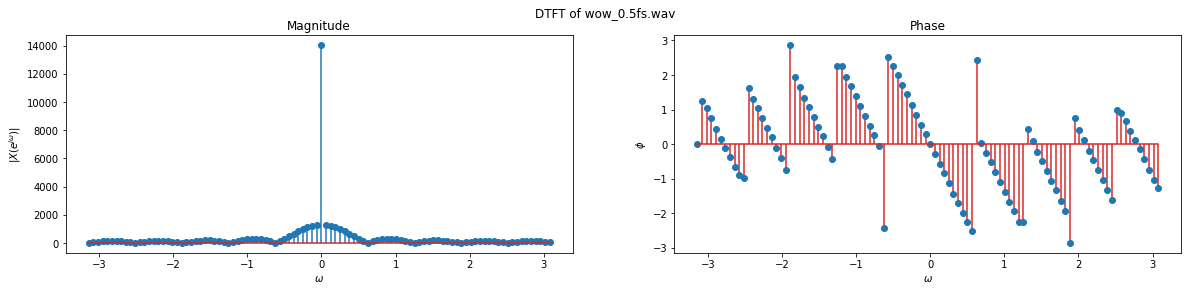

In [19]:
new_filename = fr_alter(file, 0.50)

play(file)
analyise_wav_file(file, time_len=0.02, normalise=False)

play(new_filename)
analyise_wav_file(new_filename, time_len=0.02, normalise=False)

print("Playback speed is slow.")
print("The sampling frequency(fs) is reduced by 2-folds, resulting in aliasing where unwanted"
      , "low frequency components are enhanced where their bandwidth is been increased compared to original one"
      ,".But this new framerate is better than previously observed.")

Playback speed is same.
This is just same as the original audio content


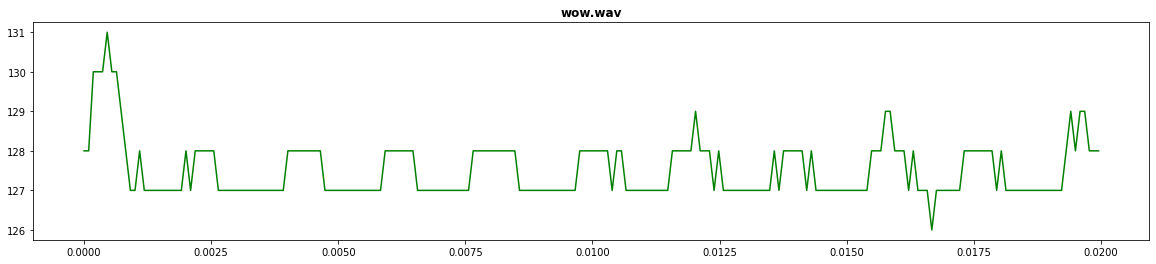

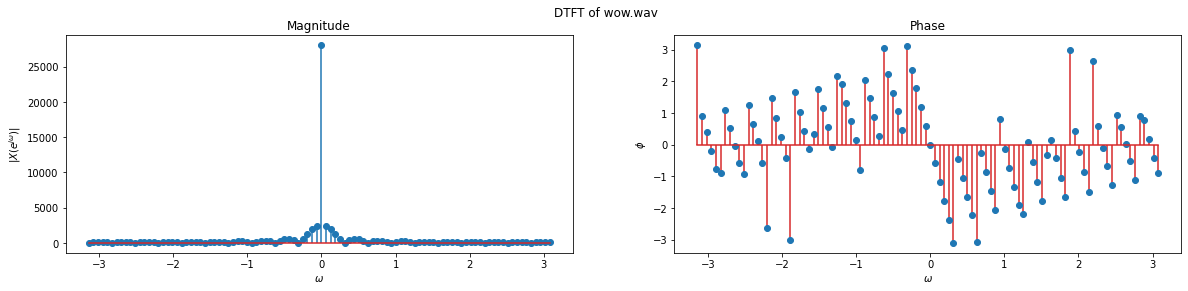

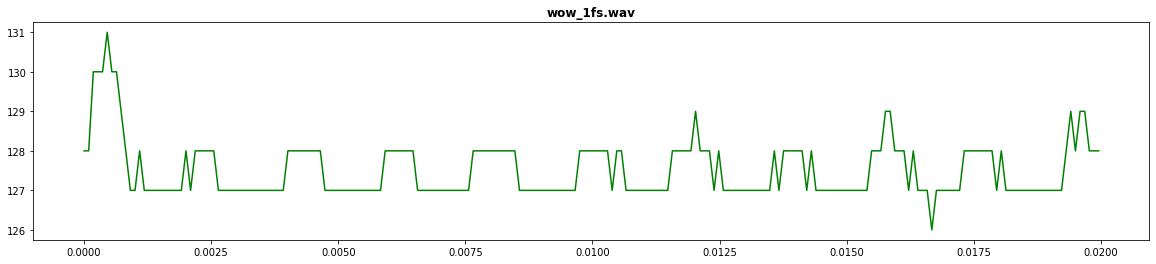

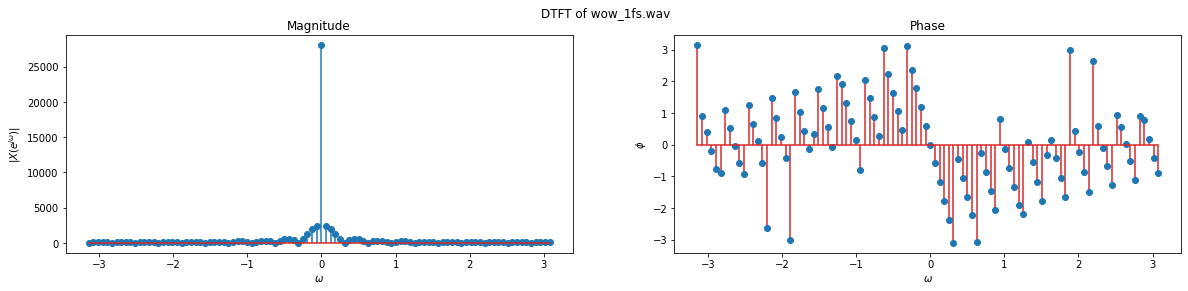

In [20]:
new_filename = fr_alter(file, 1)

play(file)
analyise_wav_file(file, time_len=0.02, normalise=False)

play(new_filename)
analyise_wav_file(new_filename, time_len=0.02, normalise=False)


print("Playback speed is same.")
print("This is just same as the original audio content")

Playback speed is fast.
Magnitude of frequency components are reducing due to high sampling rate(2fs) and there is no aliasing effect


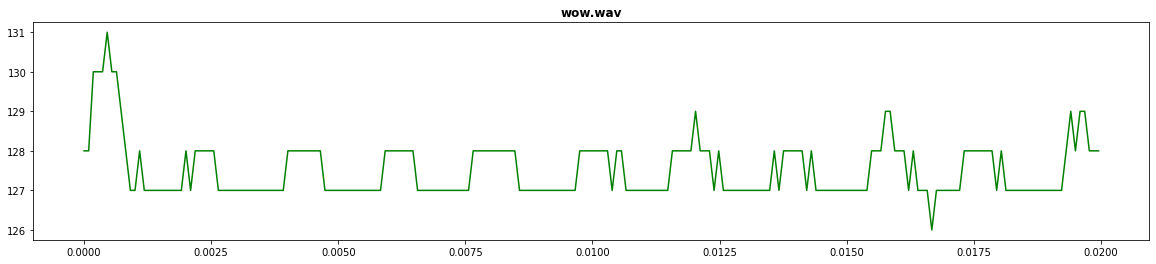

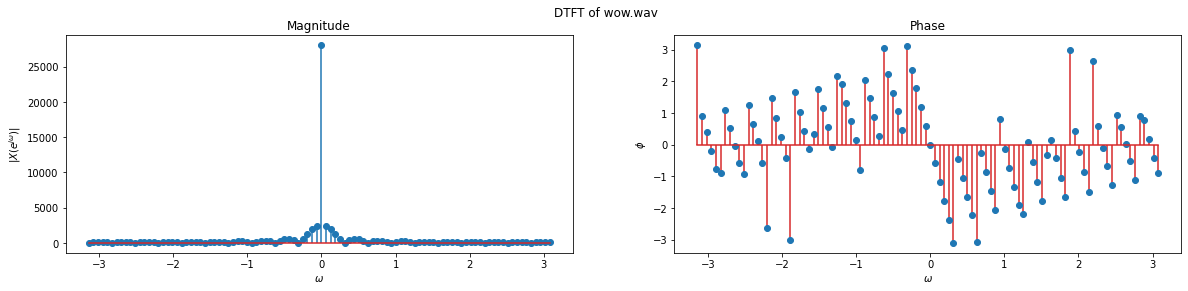

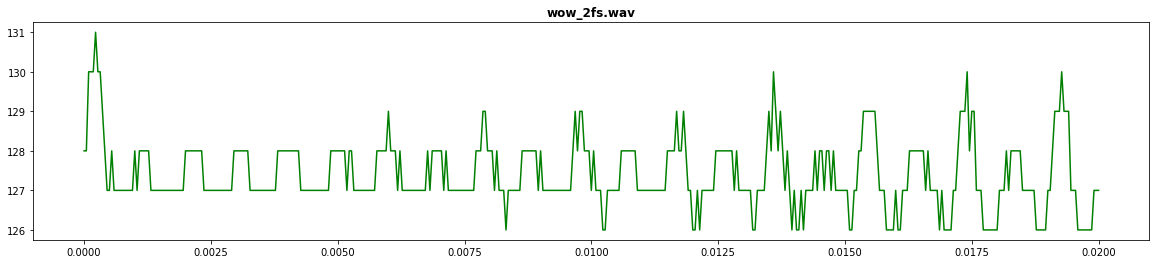

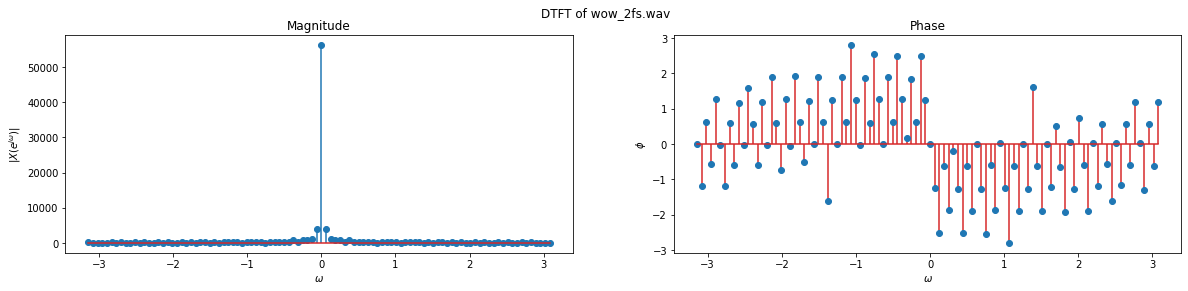

In [21]:
new_filename = fr_alter(file, 2)

play(file)
analyise_wav_file(file, time_len=0.02, normalise=False)

play(new_filename)
analyise_wav_file(new_filename, time_len=0.02, normalise=False)

print("Playback speed is fast.")
print("Magnitude of frequency components are reducing due to high sampling rate(2fs) and there is",
      "no aliasing effect")

Whenever the magnitude at the lower bound or upper bound of a band-limited signal has a non-zero component there will be aliasing at the sampling frequency(pi/T), w0/2's corresponding magnitude is being increased.

EXAMPLE:


Text(0, 0.5, '$\\sum_{n=-\\infty}^{\\infty}X(j(\\Omega- {n\\pi}/{T}))$')

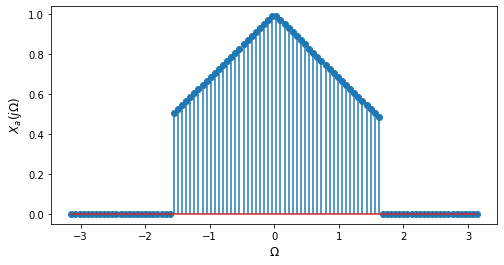

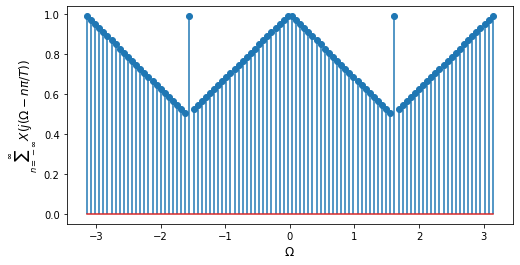

In [116]:
#PROBLEM 1.c

print("Whenever the magnitude at the lower bound or upper bound of a band-limited signal"
      , "has a non-zero component there will be aliasing at the sampling frequency(pi/T),"
      , "w0/2's corresponding magnitude is being increased.")
print("\nEXAMPLE:")

N = 100
w = np.linspace(-1*np.pi, np.pi, N)
w0 = np.pi/2

X = np.zeros(N)

for i in range(N):
    if(i <= 24):
        X[i] = 0
    elif(i <= 49):
        X[i] = 1 + w[i]/np.pi
    elif(i <= 75):
        X[i] = 1 - w[i]/np.pi
    else:
        X[i] = 0
    
plt.rcParams['figure.figsize'] = [8, 4]
plt.rc('axes', labelsize=12)

plt.figure()
plt.stem(w, X)
plt.xlabel("$\Omega$")
plt.ylabel("$X_a(j\Omega)$")

plt.figure()
plt.stem(w, X + np.roll(X,50))
plt.xlabel("$\Omega$")
plt.ylabel("$\sum_{n=-\infty}^{\infty}X(j(\Omega- {n\pi}/{T}))$")


In [117]:

def convolve(x, h, plot=True):
    n  =  x.shape[0]
    m = h.shape[0]
    print("x[n]: ", x)
    print("h[n]: ", h)
    h = np.flip(h)
    pads = np.zeros(m-1)
    x =  np.hstack((pads, x, pads))
    y = np.array([np.dot(x[i:i+m], h) for i in range(n+m-1)])

    print("y[n] = x[n]*h[n]: ", y)
    
    if plot:
        l = 15
        n = np.linspace(-1*l, l, 2*l+1)
        x = np.hstack((np.zeros(l), x, np.zeros(l+1-x.shape[0])))
        h = np.hstack((np.zeros(l), h, np.zeros(l+1-h.shape[0])))
        y = np.hstack((np.zeros(l), y, np.zeros(l+1-y.shape[0])))

        plt.rcParams['figure.figsize'] = [10, 4]
        plt.rc('axes', labelsize=12)

        fig, (ax1,ax2) = plt.subplots(1, 2)
        ax1.stem(n, x)
        ax1.set(xlabel='n', ylabel='x[n]')
        ax2.stem(n, h)
        ax2.set(xlabel='n', ylabel='h[n]')

        plt.figure()
        plt.stem(n, y)
        plt.xlabel('n')
        plt.ylabel('y[n]')
    
    return y

x[n]:  [1. 1. 1. 1. 1. 1.]
h[n]:  [1]
y[n] = x[n]*h[n]:  [1. 1. 1. 1. 1. 1.]


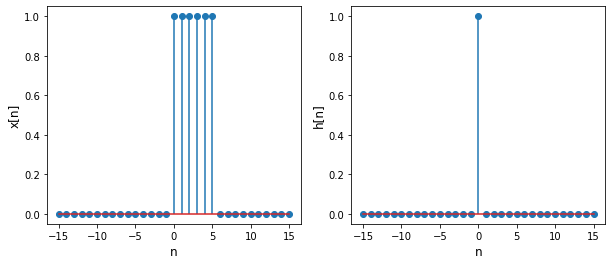

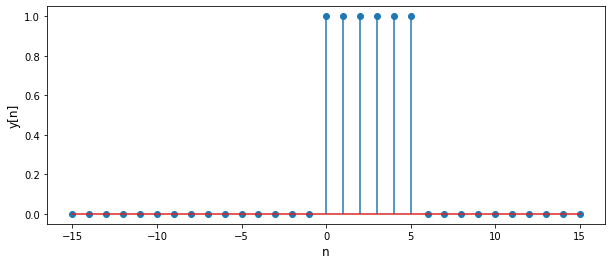

In [118]:
x = np.ones(6)
h = np.array([1])

y = convolve(x, h)

x[n]:  [1. 1. 1. 1. 1. 1.]
h[n]:  [1. 1. 1. 1. 1. 1.]
y[n] = x[n]*h[n]:  [1. 2. 3. 4. 5. 6. 5. 4. 3. 2. 1.]


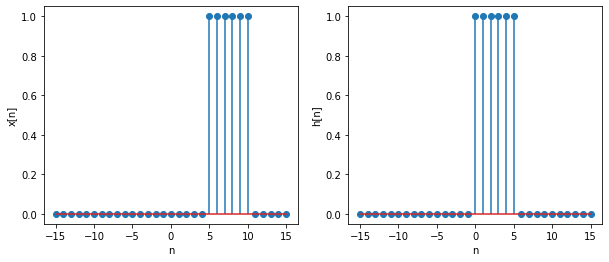

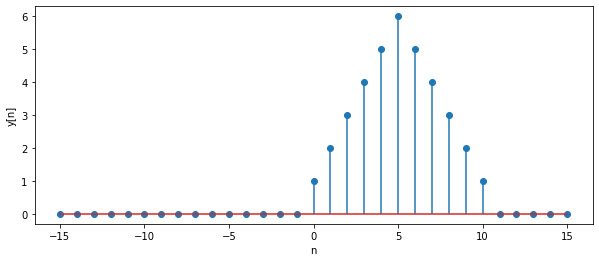

In [65]:
x = np.ones(6)
h = x
y = convolve(x, h)

x[n]:  [0 1 2 3 4 5]
h[n]:  [0 1 2 3 4 5]
y[n] = x[n]*h[n]:  [ 0.  0.  1.  4. 10. 20. 35. 44. 46. 40. 25.]


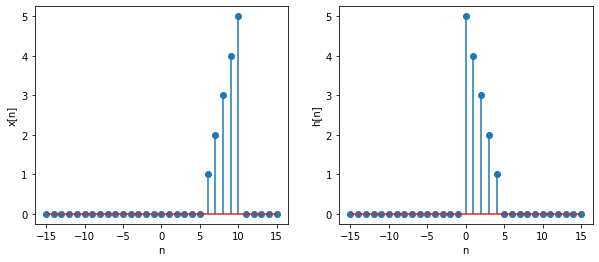

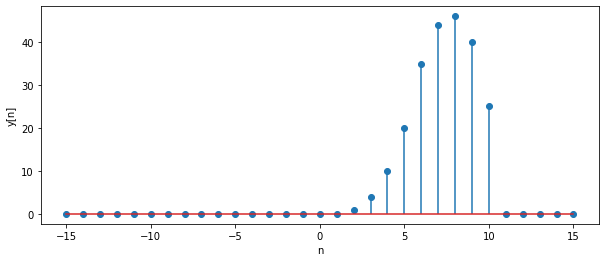

In [66]:
x = np.arange(6)
h = x

y = convolve(x, h)

x[n]:  [1. 1. 1. 1. 1. 1.]
h[n]:  [ 0.5 -0.5]
y[n] = x[n]*h[n]:  [ 0.5  0.   0.   0.   0.   0.  -0.5]


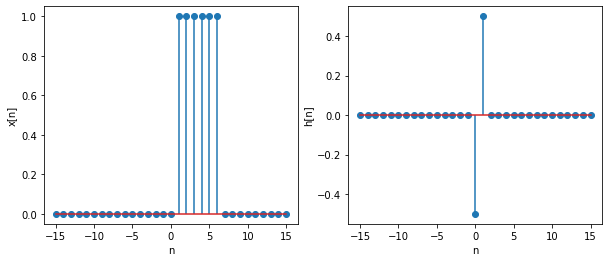

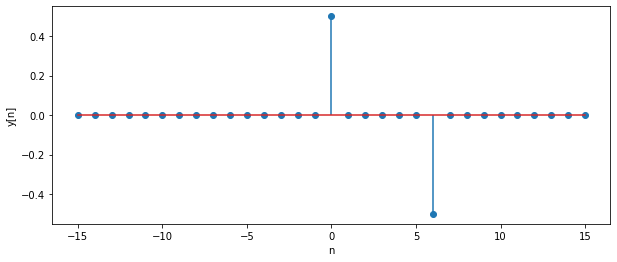

In [67]:
x = np.ones(6)
h = np.array([0.5, -0.5])

y = convolve(x, h)

x[n]:  [ 1. -1.  1. -1.  1. -1.]
h[n]:  [0.5 0.5]
y[n] = x[n]*h[n]:  [ 0.5  0.   0.   0.   0.   0.  -0.5]


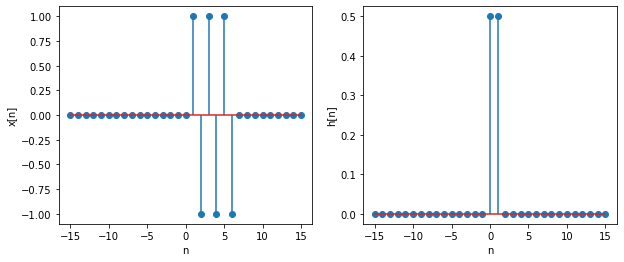

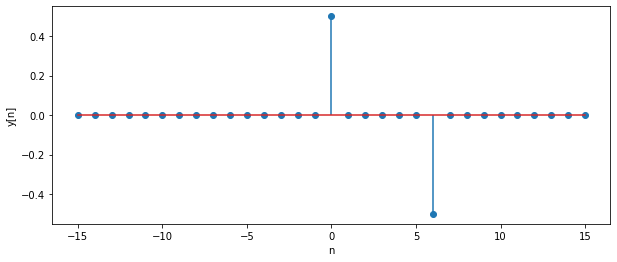

In [68]:
x = np.cos(np.pi*np.arange(6))
h = np.array([0.5, 0.5])

y = convolve(x, h)

In [72]:
def audio_convolve(i, h, normalisation, o, time_len=None):
    x, t, nframes, fr = wavfile_to_nparray(i, time_len=time_len, normalise=normalisation)
    y_file = o
    y_filep = wave.open(y_file, 'wb')
    y_filep.setnchannels(1)
    y_filep.setsampwidth(1)
    y_filep.setframerate(fr)
    
    y = convolve(x, h, plot=False)
    
    if normalisation:
        y = np.clip(y, -1, 1)
        y = (y+1)*(2**7)
    else:
        y = np.clip(y, 0, 255)

    y = y.astype(np.int8)
    y = y.tobytes()
    y_filep.writeframesraw(y)
    y_filep.close()

    return y_file

Channels= 1 , SampleWidth= 1bytes , Framerate= 11025Hz , Frames= 5397 
Duration: 0.4895238095238095s

x[n]:  [127. 127. 127. ... 127. 127. 127.]
h[n]:  [0.33 0.33 0.33]
y[n] = x[n]*h[n]:  [ 41.91  83.82 125.73 ... 125.73  83.82  41.91]

OBSERVATIONS:

--> We can observe that intensity of the audio is been reduced.
--> We can see that average value of the signal in time domain remained same
--> But the amplitude about the average value is reduced after convolution
--> At the extremes of the new audio signal we can observe spikes because  for extreme elements only one element of the impulse response is been  multiplied but for the rest there exist atleast two elements thus their average reamins constant.


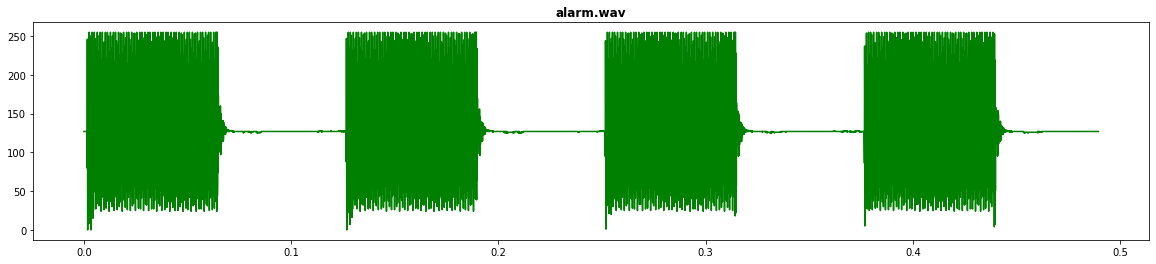

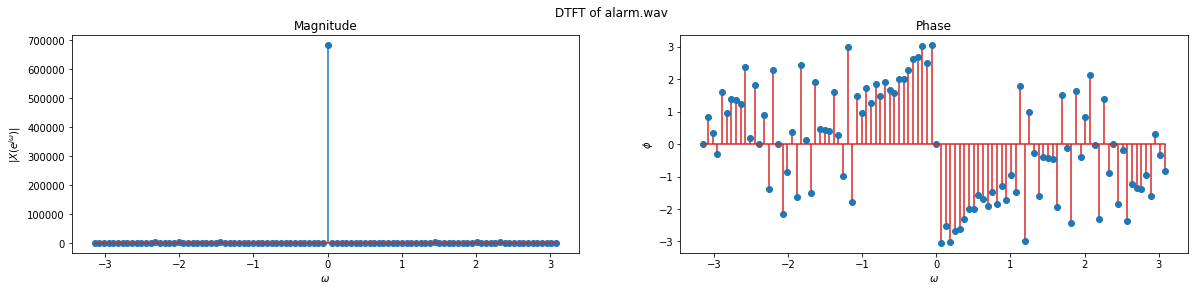

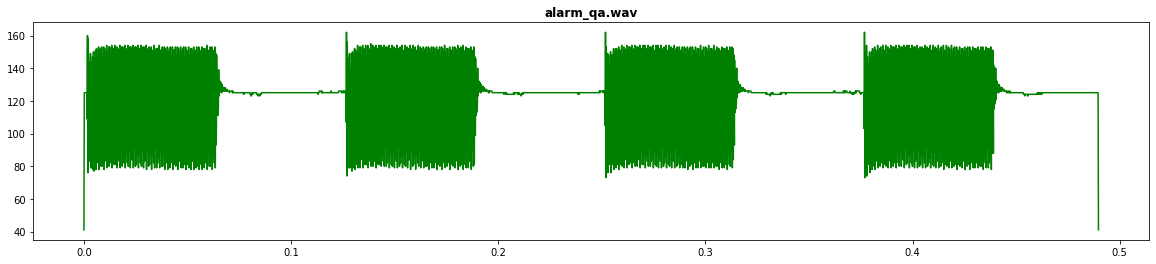

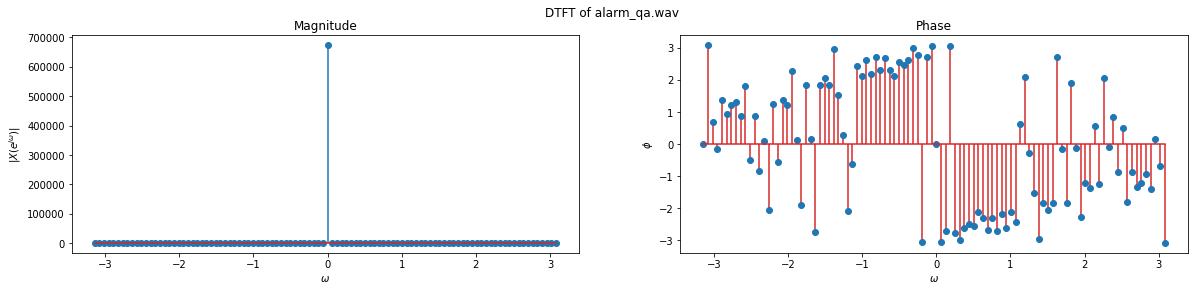

In [81]:
h = np.array([0.33, 0.33, 0.33])
file = 'alarm.wav'

op = audio_convolve(file, h, normalisation=False, o=file[:-4] + "_qa.wav")

play(file)
analyise_wav_file(file, normalise=False)

play(op)
analyise_wav_file(op, normalise=False)

print("\nOBSERVATIONS:\n")
print("--> We can observe that intensity of the audio is been reduced.")
print("--> We can see that average value of the signal in time domain remained same")
print("--> But the amplitude about the average value is reduced after convolution")
print("--> At the extremes of the new audio signal we can observe spikes because "
      ,"for extreme elements only one element of the impulse response is been "
      ,"multiplied but for the rest there exist atleast two elements thus their average reamins constant.")

Channels= 1 , SampleWidth= 1bytes , Framerate= 11025Hz , Frames= 27505 
Duration: 2.4947845804988664s

x[n]:  [121. 121. 126. ... 130. 129. 126.]
h[n]:  [0.33 0.33 0.33]
y[n] = x[n]*h[n]:  [ 39.93  79.86 121.44 ... 127.05  84.15  41.58]

OBSERVATIONS:

--> We can observe that intensity of the audio is been reduced.
--> We can see that average value of the signal in time domain remained same
--> But the amplitude about the average value is reduced after convolution
--> At the extremes of the new audio signal we can observe spikes because  for extreme elements only one element of the impulse response is been  multiplied but for the rest there exist atleast two elements thus their average reamins constant.


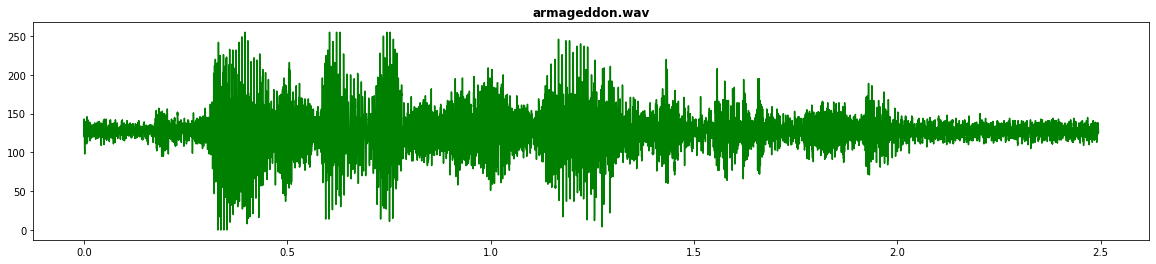

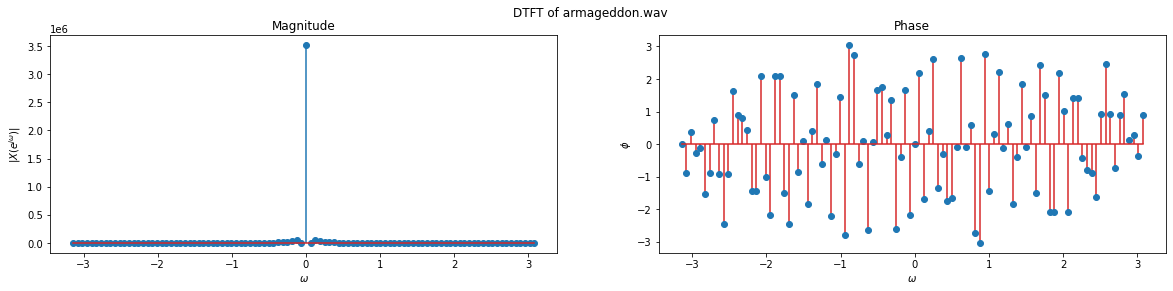

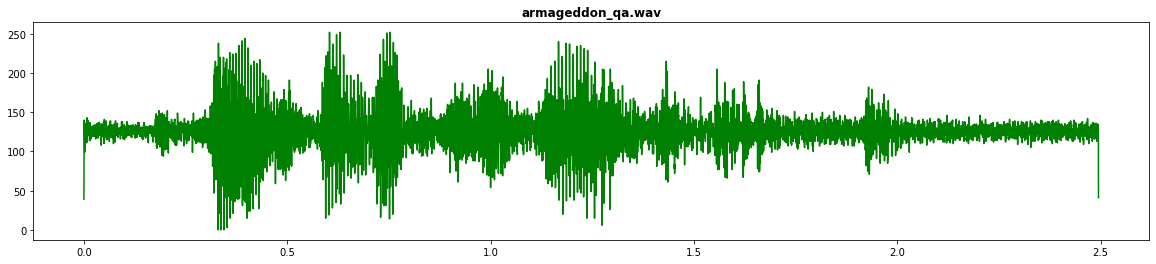

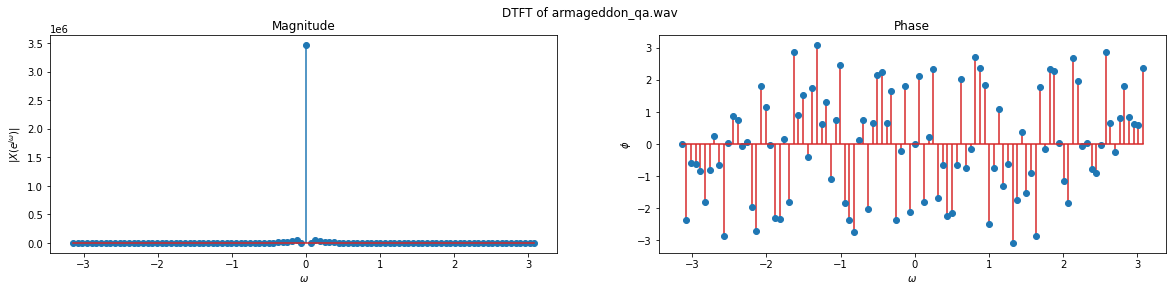

In [82]:
file = 'armageddon.wav'

op = audio_convolve(file, h, normalisation=False, o=file[:-4] + "_qa.wav")

play(file)
analyise_wav_file(file, normalise=False)

play(op)
analyise_wav_file(op, normalise=False)

print("\nOBSERVATIONS:\n")
print("--> We can observe that intensity of the audio is been reduced.")
print("--> We can see that average value of the signal in time domain remained same")
print("--> But the amplitude about the average value is reduced after convolution")
print("--> At the extremes of the new audio signal we can observe spikes because "
      ,"for extreme elements only one element of the impulse response is been "
      ,"multiplied but for the rest there exist atleast two elements thus their average reamins constant.")

Channels= 1 , SampleWidth= 1bytes , Framerate= 11025Hz , Frames= 18476 
Duration: 1.675827664399093s

x[n]:  [129. 129. 129. ... 128. 128. 128.]
h[n]:  [0.33 0.33 0.33]
y[n] = x[n]*h[n]:  [ 42.57  85.14 127.71 ... 126.72  84.48  42.24]

OBSERVATIONS:

--> We can observe that intensity of the audio is been reduced.
--> We can see that average value of the signal in time domain remained same
--> But the amplitude about the average value is reduced after convolution
--> At the extremes of the new audio signal we can observe spikes because  for extreme elements only one element of the impulse response is been  multiplied but for the rest there exist atleast two elements thus their average reamins constant.


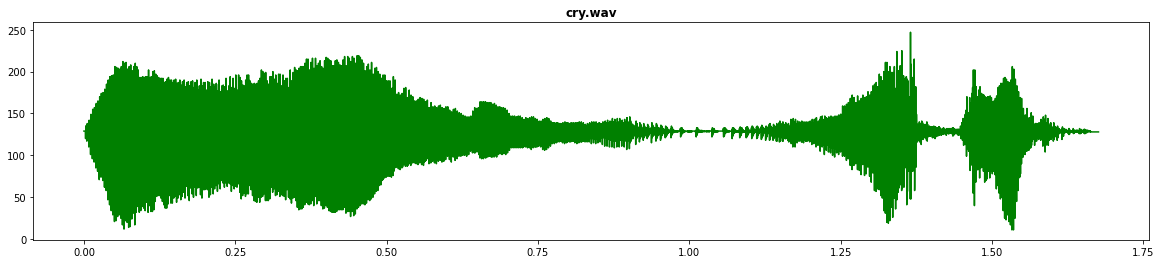

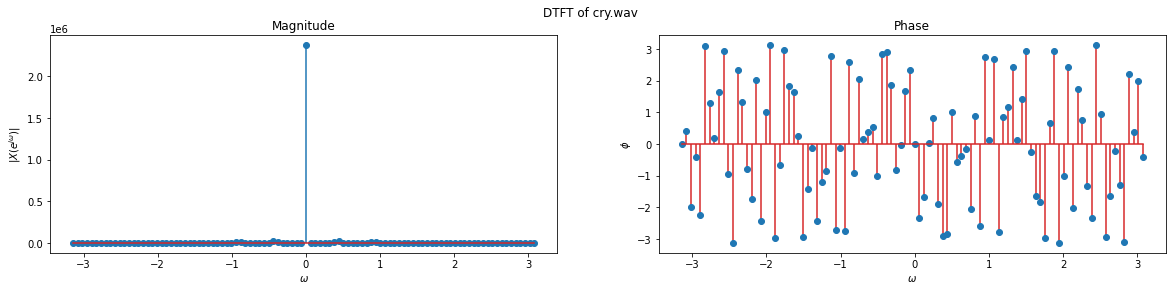

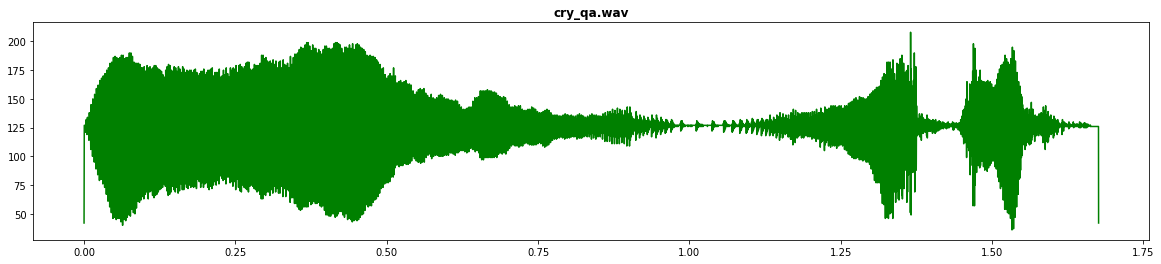

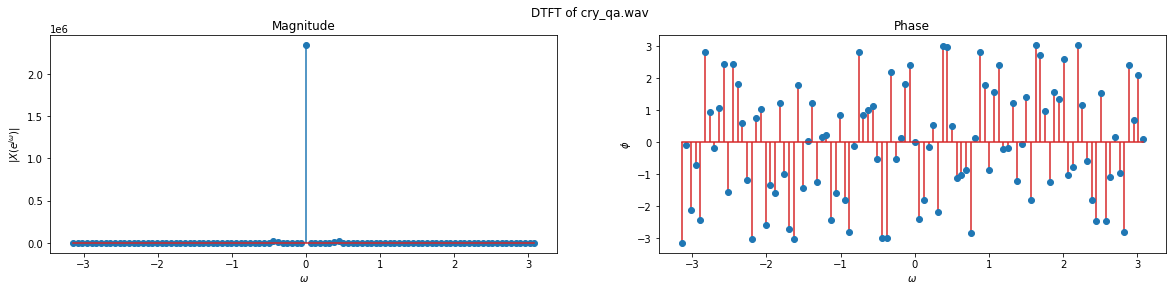

In [83]:
file = 'cry.wav'

op = audio_convolve(file, h, normalisation=False, o=file[:-4] + "_qa.wav")

play(file)
analyise_wav_file(file, normalise=False)

play(op)
analyise_wav_file(op, normalise=False)

print("\nOBSERVATIONS:\n")
print("--> We can observe that intensity of the audio is been reduced.")
print("--> We can see that average value of the signal in time domain remained same")
print("--> But the amplitude about the average value is reduced after convolution")
print("--> At the extremes of the new audio signal we can observe spikes because "
      ,"for extreme elements only one element of the impulse response is been "
      ,"multiplied but for the rest there exist atleast two elements thus their average reamins constant.")

Channels= 1 , SampleWidth= 1bytes , Framerate= 11025Hz , Frames= 15509 
Duration: 1.4067120181405897s

x[n]:  [128. 128. 130. ... 125. 126. 126.]
h[n]:  [0.33 0.33 0.33]
y[n] = x[n]*h[n]:  [ 42.24  84.48 127.38 ... 124.41  83.16  41.58]

OBSERVATIONS:

--> We can observe that intensity of the audio is been reduced.
--> We can see that average value of the signal in time domain remained same
--> But the amplitude about the average value is reduced after convolution
--> At the extremes of the new audio signal we can observe spikes because  for extreme elements only one element of the impulse response is been  multiplied but for the rest there exist atleast two elements thus their average reamins constant.


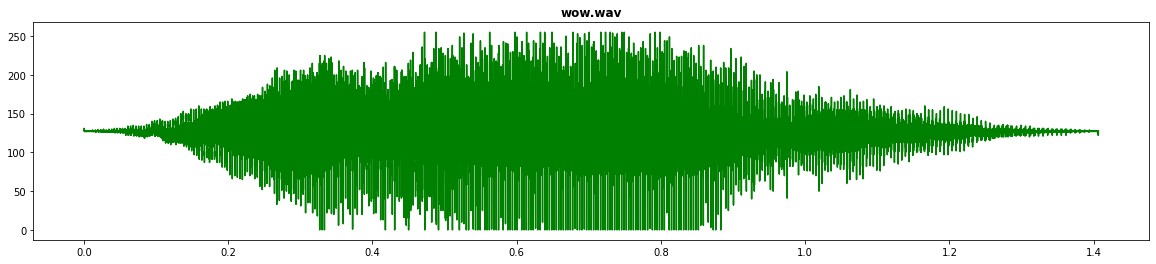

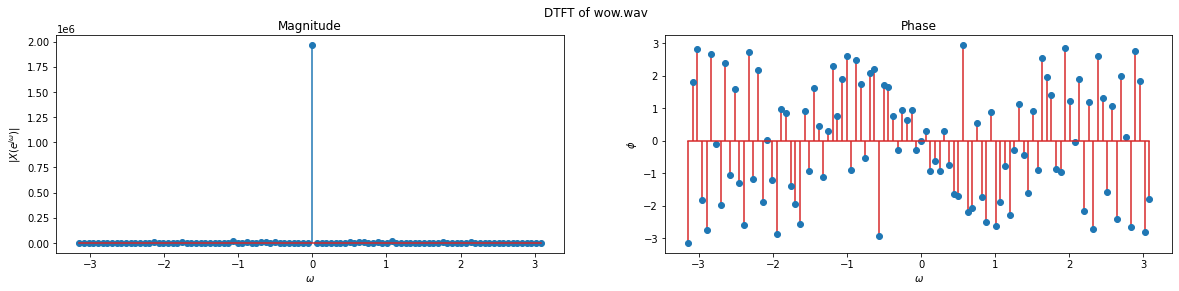

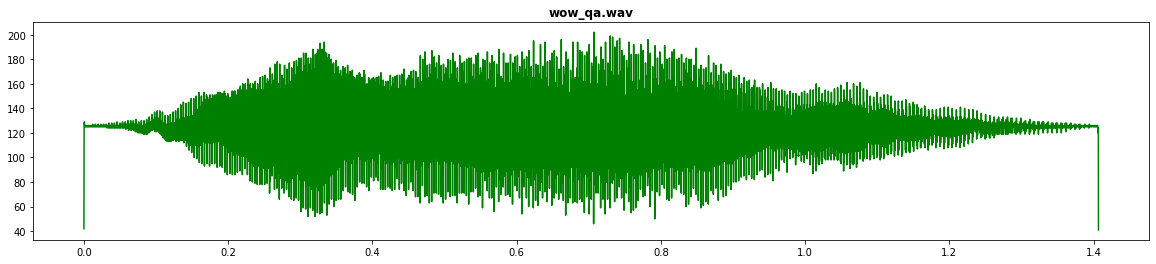

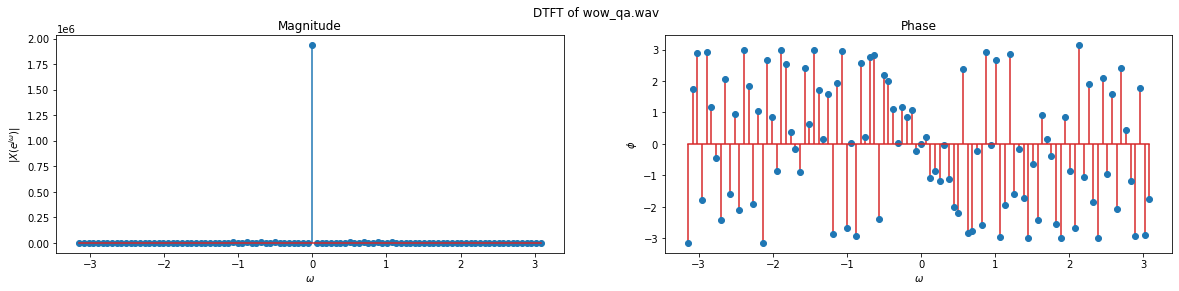

In [84]:
file = 'wow.wav'

op = audio_convolve(file, h, normalisation=False, o=file[:-4] + "_qa.wav")

play(file)
analyise_wav_file(file, normalise=False)

play(op)
analyise_wav_file(op, normalise=False)

print("\nOBSERVATIONS:\n")
print("--> We can observe that intensity of the audio is been reduced.")
print("--> We can see that average value of the signal in time domain remained same")
print("--> But the amplitude about the average value is reduced after convolution")
print("--> At the extremes of the new audio signal we can observe spikes because "
      ,"for extreme elements only one element of the impulse response is been "
      ,"multiplied but for the rest there exist atleast two elements thus their average reamins constant.")

Channels= 1 , SampleWidth= 1bytes , Framerate= 11025Hz , Frames= 5397 
Duration: 0.4895238095238095s

x[n]:  [127. 127. 127. ... 127. 127. 127.]
h[n]:  [-0.25  0.5  -0.25]
y[n] = x[n]*h[n]:  [-31.75  31.75   0.   ...   0.    31.75 -31.75]

OBSERVATIONS:

--> We can observe that intensity of the audio is been reduced.
--> Any negative cycles obtained are being clipped downed to zero beacause of negative values.
--> Only high ticks are being observed in new audio file.
--> At the extremes of the new audio signal we can observe spikes.


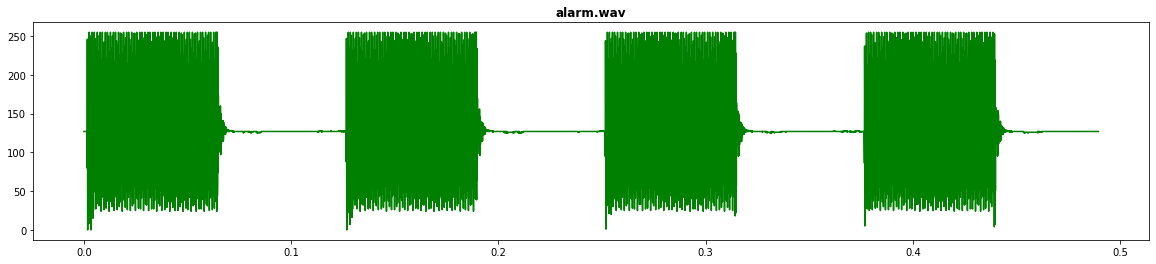

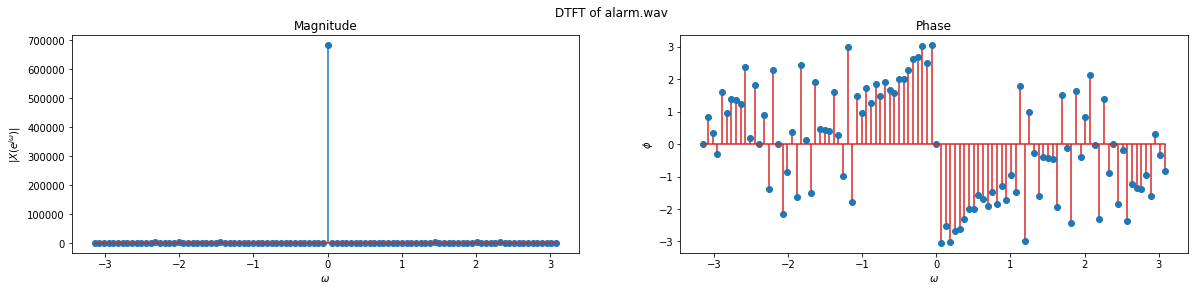

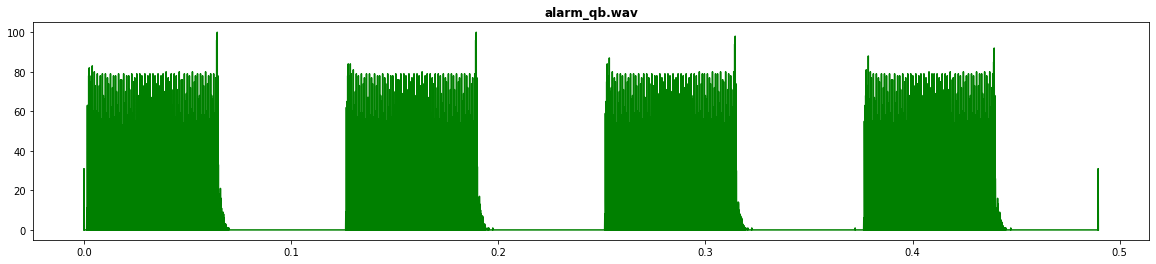

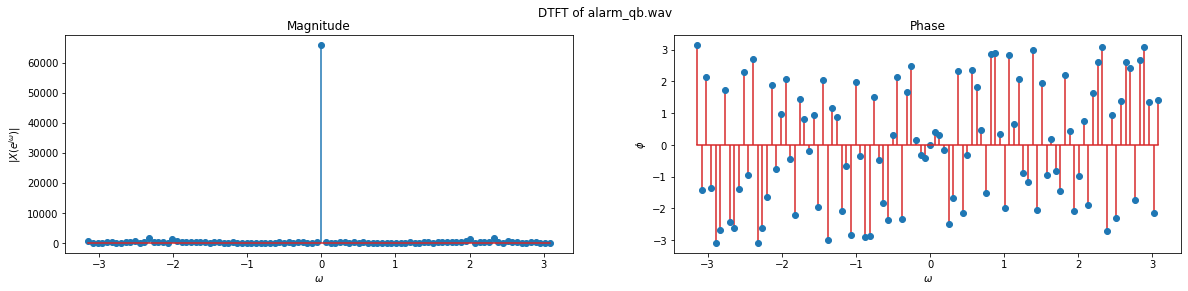

In [88]:
h = np.array([-0.25, 0.50, -0.25])
file = 'alarm.wav'

op = audio_convolve(file, h, normalisation=False, o=file[:-4] + "_qb.wav")

play(file)
analyise_wav_file(file, normalise=False)

play(op)
analyise_wav_file(op, normalise=False)

print("\nOBSERVATIONS:\n")
print("--> We can observe that intensity of the audio is been reduced but the audio content is similar.")
print("--> Any negative cycles obtained are being clipped downed to zero beacause of negative values.")
print("--> Only high ticks are being observed in new audio file.")
print("--> At the extremes of the new audio signal we can observe spikes.")

Channels= 1 , SampleWidth= 1bytes , Framerate= 11025Hz , Frames= 27505 
Duration: 2.4947845804988664s

x[n]:  [121. 121. 126. ... 130. 129. 126.]
h[n]:  [-0.25  0.5  -0.25]
y[n] = x[n]*h[n]:  [-30.25  30.25  -1.25 ...   0.5   30.75 -31.5 ]

OBSERVATIONS:

--> We can observe that intensity of the audio is been significantly reduced, but the audio content is similar.
--> Since the original signal is being oscilated around an constant value,  now after convolution this constant will become zero so only positive cycle are present
--> Here noise is been heard more than in original audio.
--> Any negative cycles obtained are being clipped downed to zero beacause of negative values.
--> At the extremes of the new audio signal we can observe spikes.


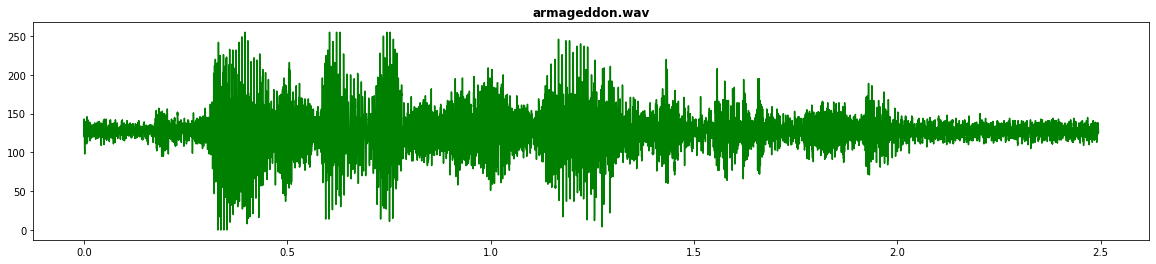

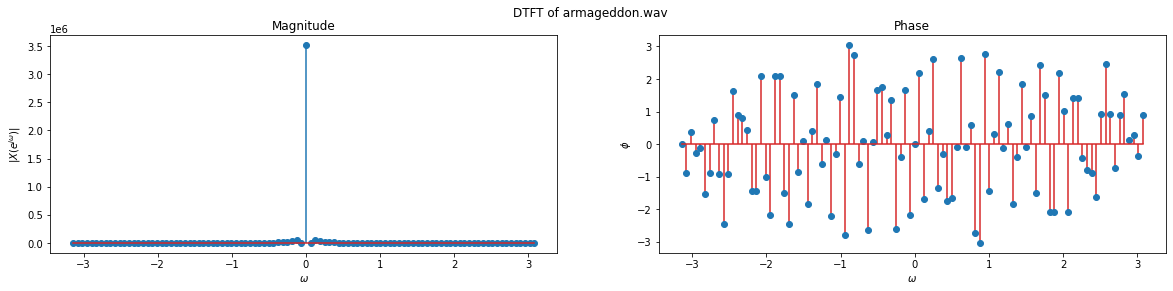

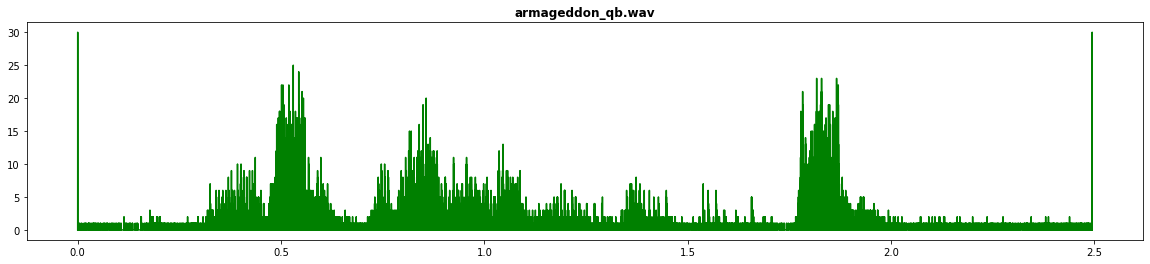

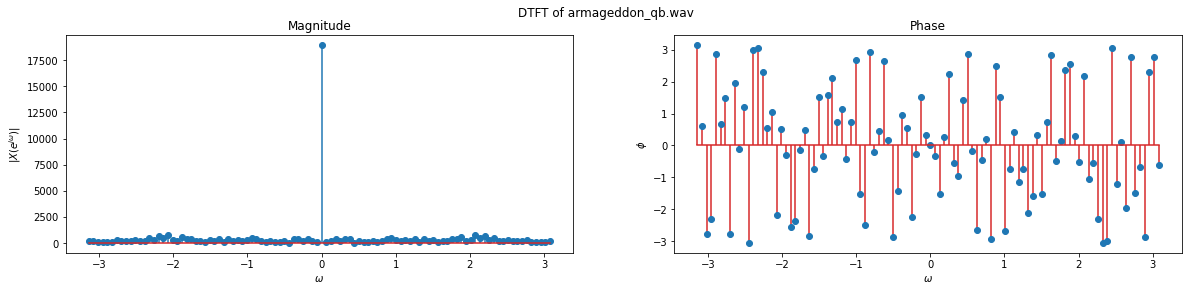

In [92]:
file = 'armageddon.wav'

op = audio_convolve(file, h, normalisation=False, o=file[:-4] + "_qb.wav")

play(file)
analyise_wav_file(file, normalise=False)

play(op)
analyise_wav_file(op, normalise=False)

print("\nOBSERVATIONS:\n")
print("--> We can observe that intensity of the audio is been significantly reduced, but the audio content is similar.")
print("--> Since the original signal is being oscilated around an constant value,",
      " now after convolution this constant will become zero so only positive cycle are present")
print("--> Here noise is been heard more than in original audio.")
print("--> Any negative cycles obtained are being clipped downed to zero beacause of negative values.")
print("--> At the extremes of the new audio signal we can observe spikes.")
print("--> We can observe that the new audio in time domain is beign smoothened compared to original audio.")

Channels= 1 , SampleWidth= 1bytes , Framerate= 11025Hz , Frames= 18476 
Duration: 1.675827664399093s

x[n]:  [129. 129. 129. ... 128. 128. 128.]
h[n]:  [-0.25  0.5  -0.25]
y[n] = x[n]*h[n]:  [-32.25  32.25   0.   ...   0.    32.   -32.  ]

OBSERVATIONS:

--> We can observe that intensity of the audio is been significantly reduced, but the audio content is similar.
--> Since the original signal is being oscilated around an constant value,  now after convolution this constant will become zero so only positive cycle are present
--> Here noise is been heard more than in original audio.
--> Any negative cycles obtained are being clipped downed to zero beacause of negative values.
--> At the extremes of the new audio signal we can observe spikes.


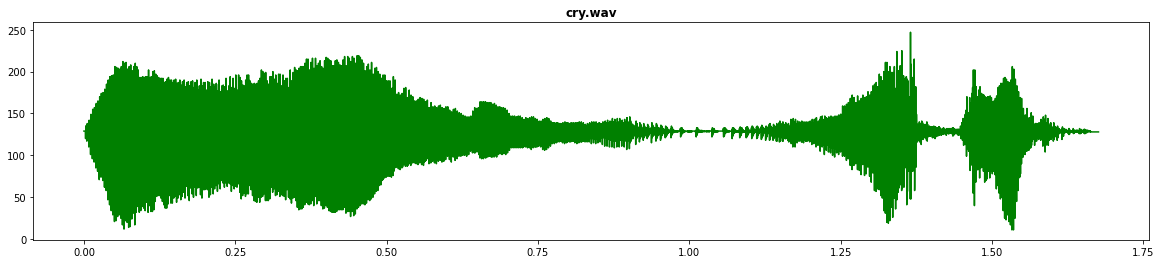

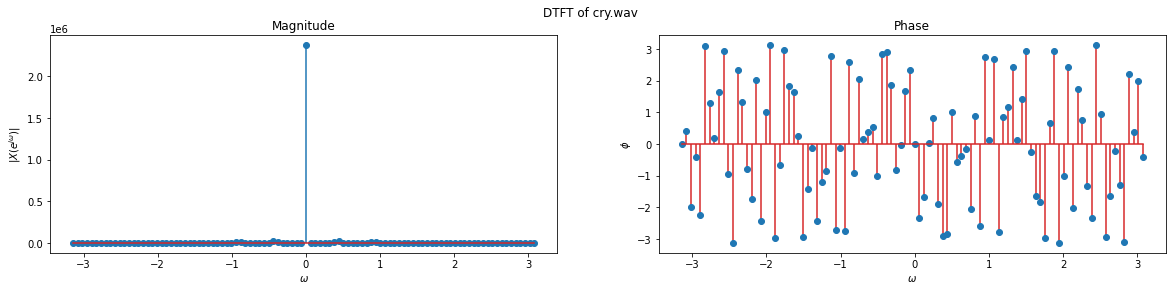

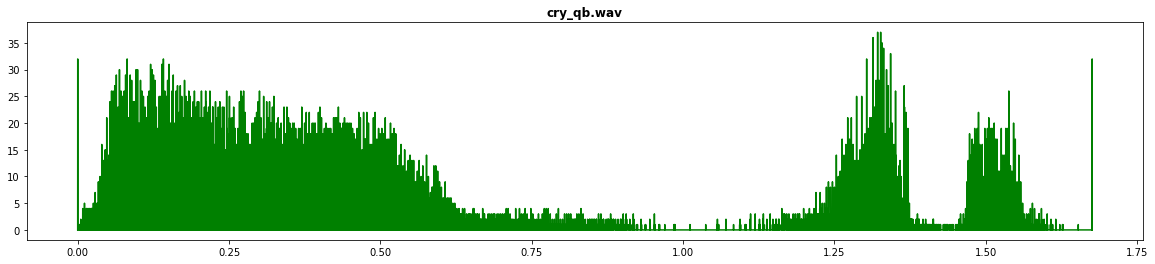

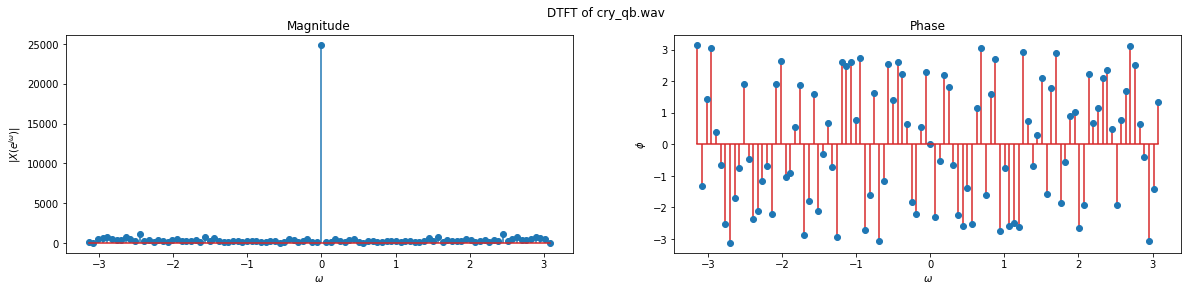

In [93]:
file = 'cry.wav'

op = audio_convolve(file, h, normalisation=False, o=file[:-4] + "_qb.wav")

play(file)
analyise_wav_file(file, normalise=False)

play(op)
analyise_wav_file(op, normalise=False)

print("\nOBSERVATIONS:\n")
print("--> We can observe that intensity of the audio is been significantly reduced, but the audio content is similar.")
print("--> Since the original signal is being oscilated around an constant value,",
      " now after convolution this constant will become zero so only positive cycle are present")
print("--> Here noise is been heard more than in original audio.")
print("--> Any negative cycles obtained are being clipped downed to zero beacause of negative values.")
print("--> At the extremes of the new audio signal we can observe spikes.")
print("--> We can observe that the new audio in time domain is beign smoothened compared to original audio.")

Channels= 1 , SampleWidth= 1bytes , Framerate= 11025Hz , Frames= 15509 
Duration: 1.4067120181405897s

x[n]:  [128. 128. 130. ... 125. 126. 126.]
h[n]:  [-0.25  0.5  -0.25]
y[n] = x[n]*h[n]:  [-32.    32.    -0.5  ...   0.25  31.5  -31.5 ]

OBSERVATIONS:

--> We can observe that intensity of the audio is been significantly reduced, but the audio content is similar.
--> Since the original signal is being oscilated around an constant value,  now after convolution this constant will become zero so only positive cycle are present
--> Here noise is been heard more than in original audio.
--> Any negative cycles obtained are being clipped downed to zero beacause of negative values.
--> At the extremes of the new audio signal we can observe spikes.
--> We can observe that the new audio in time domain is beign smoothened compared to original audio.


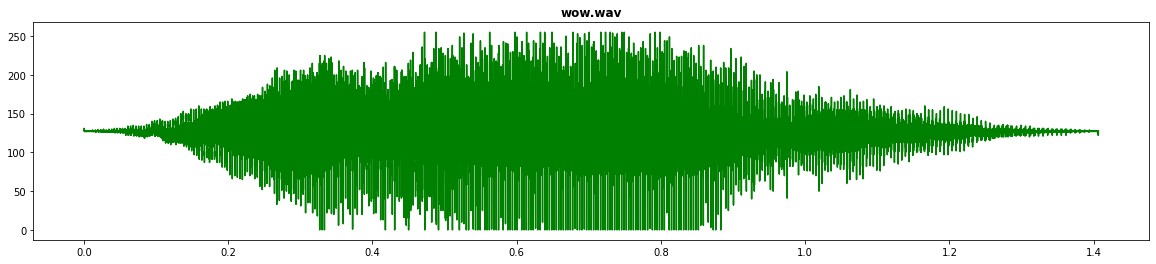

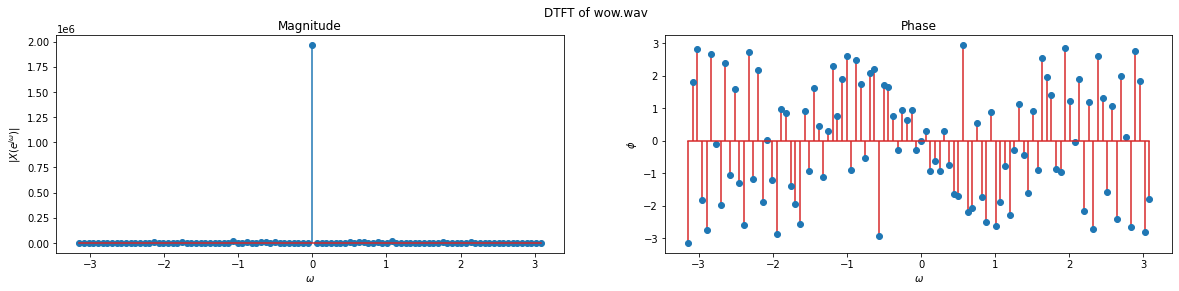

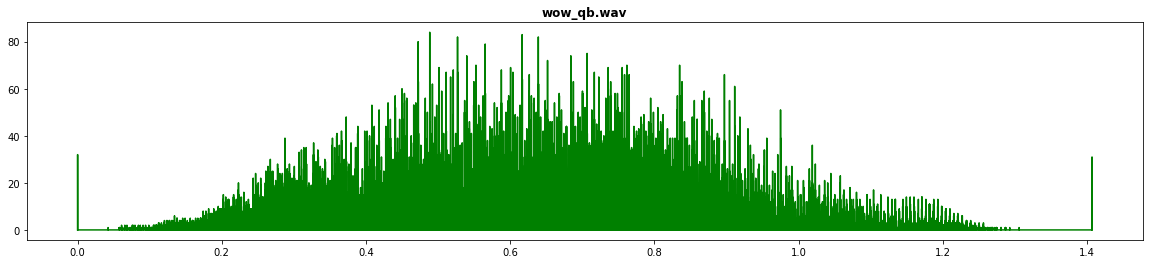

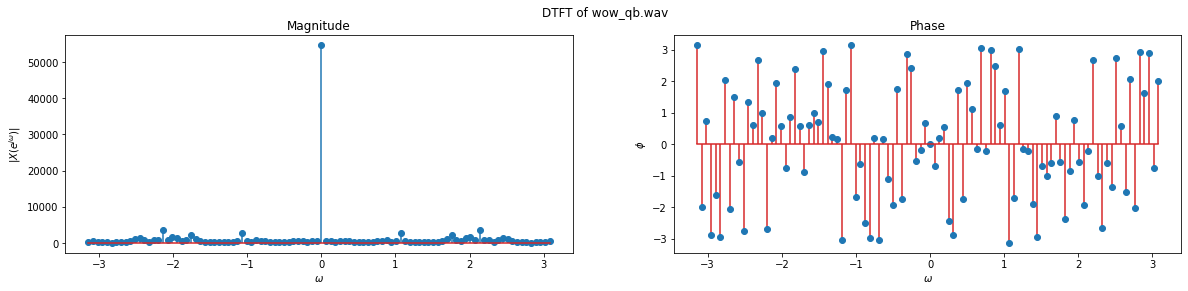

In [95]:
file = 'wow.wav'

op = audio_convolve(file, h, normalisation=False, o=file[:-4] + "_qb.wav")

play(file)
analyise_wav_file(file, normalise=False)

play(op)
analyise_wav_file(op, normalise=False)

print("\nOBSERVATIONS:\n")
print("--> We can observe that intensity of the audio is been significantly reduced, but the audio content is similar.")
print("--> Since the original signal is being oscilated around an constant value,",
      " now after convolution this constant will become zero so only positive cycle are present")
print("--> Here noise is been heard more than in original audio.")
print("--> Any negative cycles obtained are being clipped downed to zero beacause of negative values.")
print("--> At the extremes of the new audio signal we can observe spikes.")
print("--> We can observe that the new audio in time domain is beign smoothened compared to original audio.")
print("--> The low intensity audio signals are being amplified.")